In [1]:
import scikitplot as skplt
import sklearn
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
sns.set_style("darkgrid")
from datetime import datetime, date

# Scaler
#from sklearn.preprocessing import MinMaxdScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Plot confusion matrix
# from sklearn.metrics import plot_confusion_matrix <- Deprecada
from sklearn.metrics import ConfusionMatrixDisplay

# Métricas
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, PrecisionRecallDisplay

In [2]:
# Unbalaneced datasets
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [3]:
# Model comparison
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [4]:
# Classification Models
from sklearn.neighbors import KNeighborsClassifier

# Supervised
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Unsupervised
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [5]:
# Eliminar warnings del notebook

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Ajustar el número máximo de filas y columnas a visualizar en pandas

start_time = time.time()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
# Versiones instaladas

In [8]:
print('Scikit Plot Version : ', skplt.__version__)
print('Scikit Learn Version : ', sklearn.__version__)
print('Python Version : ', sys.version)

Scikit Plot Version :  0.3.7
Scikit Learn Version :  1.2.2
Python Version :  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


# Lectura del fichero resultante de la preparación, limpieza y transformación de los datos  

In [9]:
df_total = pd.read_csv('fraudTotal.csv')

Realizamos algunas comprobaciones para asegurarnos de que todo es correcto: 

In [10]:
df_total.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Population_group,hour,dayofweek,month,year,age,age_group,distance_km,dist_km_group
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,<500K,0,1,1,2019,35,[30-40),78.619775,[75-100 km)
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,<500K,0,1,1,2019,45,[40-50),30.220712,[25-50 km)
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,<500K,0,1,1,2019,61,[60-70),108.236654,[100-125 km)
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,<500K,0,1,1,2019,56,[50-60),95.700262,[75-100 km)
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,<500K,0,1,1,2019,37,[30-40),77.578656,[75-100 km)


In [11]:
print(df_total.shape)

(1852394, 32)


In [12]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

No hay valores nulos.

# Ingeniería de características (Feature Engineering)

## Borrado de columnas que no formarán parte de los modelos

Hacemos una copia del fichero, a modo de backup, que guardaremos.

In [13]:
df_total_backup = df_total.copy()

Borramos las columnas que no van a formar parte de los modelos porque no nos interesan para el aprendizaje automático o porque sus datos están en otras que sí seleccionaremos:  

In [14]:
df_total.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'zip',  
               'dob', 'trans_num', 'unix_time', 'Population_group', 'age_group', 'dist_km_group'],
                axis=1, inplace=True)

In [15]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 19 columns):
 #   Column       Dtype  
---  ------       -----  
 0   merchant     object 
 1   category     object 
 2   amt          float64
 3   gender       object 
 4   city         object 
 5   state        object 
 6   lat          float64
 7   long         float64
 8   city_pop     int64  
 9   job          object 
 10  merch_lat    float64
 11  merch_long   float64
 12  is_fraud     int64  
 13  hour         int64  
 14  dayofweek    int64  
 15  month        int64  
 16  year         int64  
 17  age          int64  
 18  distance_km  float64
dtypes: float64(6), int64(7), object(6)
memory usage: 268.5+ MB


**NOTA:** La selección de variables forma parte de la fase de **Preparación de los Datos**, pero se realiza aquí porque en este caso nos interesa que todos los notebooks lean del mismo fichero (**fraudTotal.csv**).

## Distribución de las variables continuas amt, age, city_pop y distance_km

In [16]:
# Configurar opciones de visualización para que el formato sea flotante y no exponencial
pd.set_option('display.float_format', '{:.6f}'.format)

df_total.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,dayofweek,month,year,age,distance_km
count,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000,1852394.000000
mean,70.063567,38.539311,-90.227832,88643.674509,38.538976,-90.227940,0.005210,12.806119,2.967456,7.152067,2019.500727,49.646635,76.133230
std,159.253975,5.071470,13.747895,301487.618344,5.105604,13.759692,0.071992,6.815753,2.197983,3.424954,0.500000,17.403368,29.125197
min,1.000000,20.027100,-165.672300,23.000000,19.027422,-166.671575,0.000000,0.000000,0.000000,1.000000,2019.000000,18.000000,0.022261
25%,9.640000,34.668900,-96.798000,741.000000,34.740122,-96.899440,0.000000,7.000000,1.000000,4.000000,2019.000000,36.000000,55.335717
50%,47.450000,39.354300,-87.476900,2443.000000,39.368900,-87.440694,0.000000,14.000000,3.000000,7.000000,2020.000000,48.000000,78.238478
75%,83.100000,41.940400,-80.158000,20328.000000,41.956263,-80.245108,0.000000,19.000000,5.000000,10.000000,2020.000000,61.000000,98.537299
max,28948.900000,66.693300,-67.950300,2906700.000000,67.510267,-66.950902,1.000000,23.000000,6.000000,12.000000,2020.000000,99.000000,152.160151


In [17]:
cols = ['amt', 'age', 'distance_km', 'city_pop']

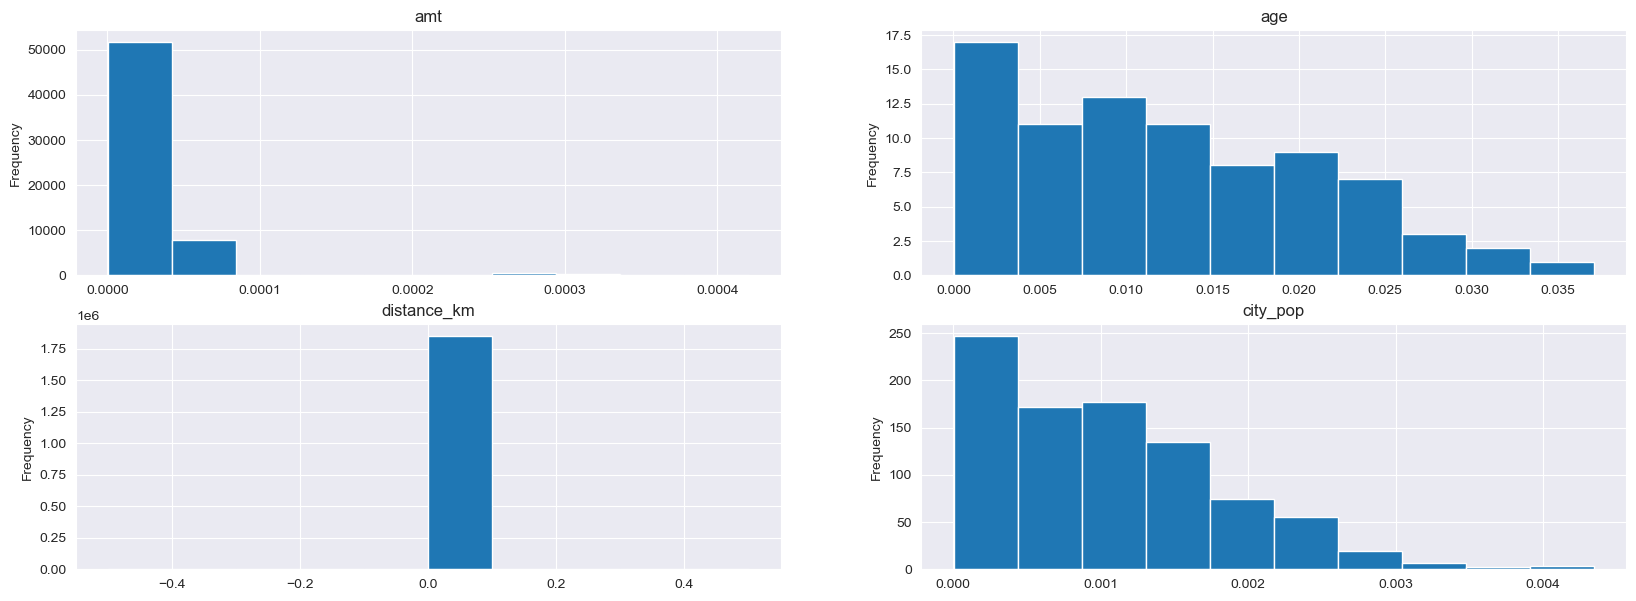

In [18]:
# Histogramas de las cuatro variables

plt.figure(figsize=[20,7])

for ind, col in enumerate(cols):
    plt.subplot(2,2,ind+1)
    df_total[col].value_counts(normalize=True).plot.hist()
    plt.title(col)
plt.show()

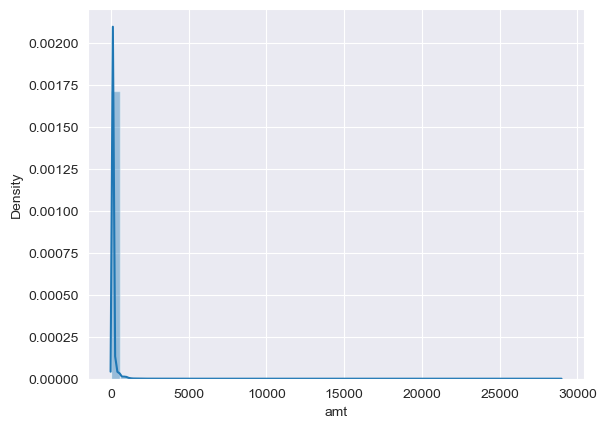

In [19]:
# Función de distribución de amt

sns.distplot(df_total.amt)
plt.show()

La distribución de **amt** no es una distribución normal, sino que está sesgada.  

Le aplicamos una transformación logarítmica para normalizarla.

In [20]:
df_total['amt'] = np.log(df_total['amt'])

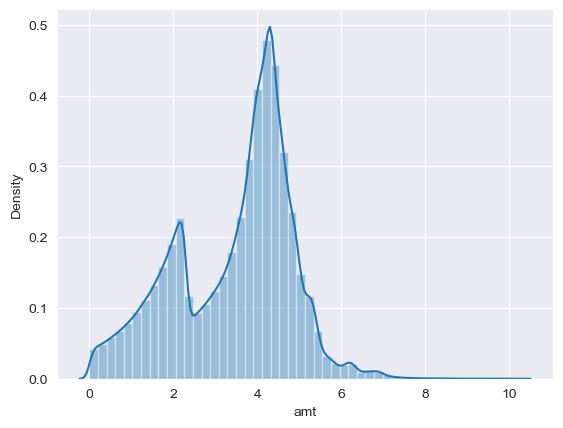

In [21]:
# Función de distribución de amt

sns.distplot(df_total.amt)
plt.show()

Vemos que la normalidad de la distribución ha mejorado bastante con la transformación. 

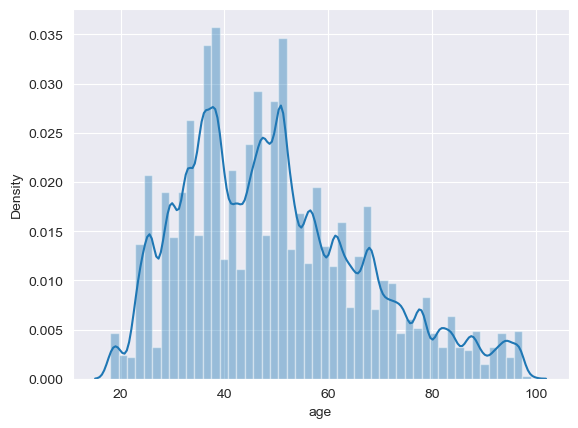

In [22]:
# Función de distribución de age

sns.distplot(df_total.age)
plt.show()

No es una distribución normal pero no está muy sesgada. No hace falta transformarla.

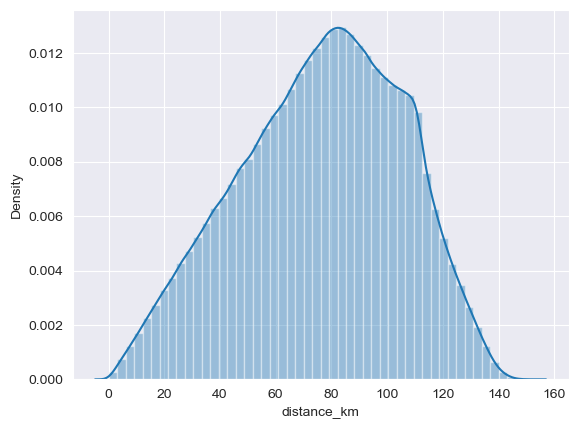

In [23]:
# Función de distribución de distance_km

sns.distplot(df_total.distance_km)
plt.show()

Tampoco es necesario aplicarle ninguna transformación.

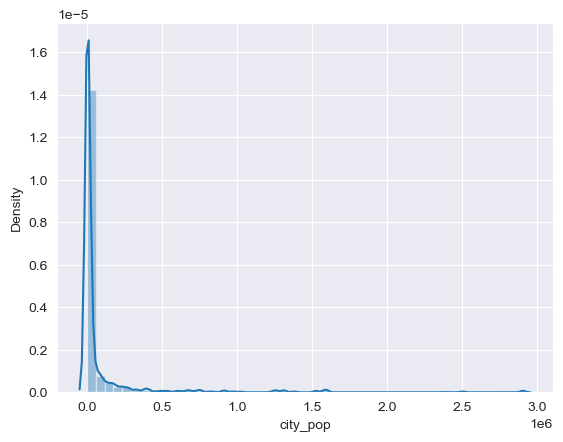

In [24]:
# Función de distribución de city_pop

sns.distplot(df_total.city_pop)
plt.show()

Al igual que **amt**, está sesgada, así que le aplicamos también una transformación logarítmica.

In [25]:
df_total['city_pop'] = np.log(df_total['city_pop'])

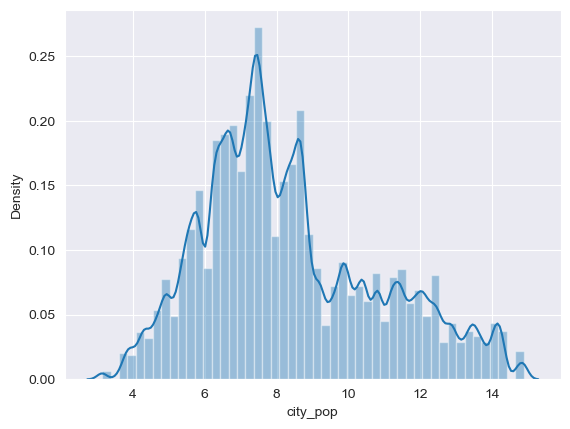

In [26]:
# Función de distribución de city_pop

sns.distplot(df_total.city_pop)
plt.show()

Vemos que la normalidad de la distribución ha mejorado bastante con la transformación.

## Codificación de las variables categóricas con muchos valores (Label Encoding)

In [27]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 19 columns):
 #   Column       Dtype  
---  ------       -----  
 0   merchant     object 
 1   category     object 
 2   amt          float64
 3   gender       object 
 4   city         object 
 5   state        object 
 6   lat          float64
 7   long         float64
 8   city_pop     float64
 9   job          object 
 10  merch_lat    float64
 11  merch_long   float64
 12  is_fraud     int64  
 13  hour         int64  
 14  dayofweek    int64  
 15  month        int64  
 16  year         int64  
 17  age          int64  
 18  distance_km  float64
dtypes: float64(7), int64(6), object(6)
memory usage: 268.5+ MB


Primero vamos a ver cuántos valores toman las variables **merchant**, **category**, **job** y **city**:

In [28]:
len(df_total.merchant.value_counts())

693

In [29]:
len(df_total.category.value_counts())

14

In [30]:
len(df_total.job.value_counts())

497

In [31]:
len(df_total.city.value_counts())

906

Como **merchant**, **job** y **city** tienen muchas categorías, les vamos a aplicar LabelEncoder porque con dummy se generarían muchas columnas:

In [32]:
label_encoder = LabelEncoder()

In [33]:
df_total['merchant'] = label_encoder.fit_transform(df_total['merchant'])

In [34]:
df_total['merchant'].value_counts()

merchant
316    6262
105    5246
571    5195
349    5031
70     4999
       ... 
143    1101
633    1098
544    1095
221    1091
516    1090
Name: count, Length: 693, dtype: int64

In [35]:
df_total['job'] = label_encoder.fit_transform(df_total['job'])

In [36]:
df_total['job'].value_counts()

job
194    13898
188    13167
442    12436
309    12434
287    11711
121    11688
179    10974
195    10963
447    10962
240    10943
110    10241
410    10234
71     10211
74     10199
346     9525
102     9515
278     9506
16      9500
329     9494
439     9488
42      8801
227     8787
55      8786
272     8773
307     8772
415     8768
44      8767
91      8765
299     8762
243     8760
492     8740
383     8080
288     8062
418     8056
353     8054
196     8054
261     8052
406     8052
155     8050
113     8047
335     8046
373     8044
86      8042
137     8041
216     8041
151     8038
376     8036
333     8036
281     8028
198     8021
72      7334
408     7332
156     7330
136     7321
397     7319
292     7309
271     7307
413     7306
479     7304
147     7301
251     7301
462     7297
115     7297
70      7296
431     7283
480     6611
4       6595
472     6594
112     6590
443     6589
146     6588
120     6586
171     6584
385     6583
386     6582
301     6582
426     

In [37]:
df_total['city'] = label_encoder.fit_transform(df_total['city'])

In [38]:
df_total['city'].value_counts()

city
74     8040
733    7312
832    7309
651    7297
507    7289
       ... 
138       7
402       7
833       7
791       7
882       6
Name: count, Length: 906, dtype: int64

## Crear variables dummy para el resto de categóricas 

Al resto de variables categóricas, que toman un número más pequeño de categorías, les aplicamos **hot_encoding**.

In [39]:
cat_cols = ['category', 'gender', 'city','state']

In [40]:
dummy = pd.get_dummies(df_total[cat_cols], drop_first=True)

Añadimos el resultado al fichero original:

In [41]:
df_total = pd.concat([df_total, dummy], axis=1)

In [42]:
df_total.drop(cat_cols, axis=1, inplace=True)
df_total.head()

,merchant,amt,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,dayofweek,month,year,age,distance_km,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,514,1.603420,36.078800,-81.178100,8.159089,372,36.011293,-82.048315,0,0,1,1,2019,35,78.619775,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,241,4.674976,48.887800,-118.210500,5.003946,431,49.159047,-118.186462,0,0,1,1,2019,45,30.220712,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,390,5.394127,42.180800,-112.262000,8.331827,308,43.150704,-112.154481,0,0,1,1,2019,61,108.236654,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,360,3.806662,46.230600,-112.113800,7.569928,330,47.034331,-112.561071,0,0,1,1,2019,56,95.700262,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,297,3.736717,38.420700,-79.462900,4.595120,116,38.674999,-78.632459,0,0,1,1,2019,37,77.578656,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


# Pasos previos a la construcción de modelos

## Dividir en train y test

In [43]:
train,test = train_test_split(df_total,test_size=0.3,random_state=42, stratify=df_total.is_fraud)

In [44]:
print(f'train data shape:{train.shape}')
print(f'test data shape:{test.shape}')

train data shape:(1296675, 79)
test data shape:(555719, 79)


Mismos números de filas que al inicio.

In [45]:
train.is_fraud.value_counts(normalize=True)

is_fraud
0   0.994790
1   0.005210
Name: proportion, dtype: float64

In [46]:
test.is_fraud.value_counts(normalize=True)

is_fraud
0   0.994791
1   0.005209
Name: proportion, dtype: float64

Mismos porcentajes de fraude/no fraude que inicialmente.  

**NOTA:** La selección de variables forma parte de la fase de **Preparación de los Datos**, pero se realiza aquí porque en este caso nos interesa que todos los notebooks lean del mismo fichero (**fraudTotal.csv**).

## En train y test, separar la variable objetivo del resto


Variable objetivo de **train**:

In [47]:
y_train = train.pop('is_fraud')

In [48]:
y_train.value_counts()

is_fraud
0    1289919
1       6756
Name: count, dtype: int64

In [49]:
X_train = train


Variable objetivo de **test**:

In [50]:
y_test = test.pop('is_fraud')

In [51]:
y_test.value_counts()

is_fraud
0    552824
1      2895
Name: count, dtype: int64

In [52]:
X_test = test

In [53]:
X_train.head()

,merchant,amt,lat,long,city_pop,job,merch_lat,merch_long,hour,dayofweek,month,year,age,distance_km,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
1606730,605,4.131801,33.374900,-99.847300,5.181784,489,33.982824,-99.626096,4,5,10,2020,40,70.648879,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
762160,598,1.715598,33.977800,-86.559800,8.293049,17,33.875221,-86.806611,18,4,11,2019,46,25.476017,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1446803,67,2.292535,37.622300,-97.313600,12.923073,464,37.682608,-97.540664,10,2,8,2020,93,21.090685,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
172336,397,1.838961,42.958000,-77.308300,9.279587,115,42.039191,-77.065052,17,6,3,2019,71,104.124269,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1364867,637,3.030617,39.412500,-80.635200,5.541264,74,40.259233,-81.285110,14,1,7,2020,51,109.318985,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [54]:
X_test.head()

,merchant,amt,lat,long,city_pop,job,merch_lat,merch_long,hour,dayofweek,month,year,age,distance_km,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
1503399,113,4.724286,33.977800,-86.559800,8.293049,17,34.199595,-87.308746,14,1,9,2020,46,73.266573,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
158457,137,1.631199,34.124800,-117.903100,10.997171,84,33.508908,-117.208249,8,0,3,2019,40,93.891478,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201199,341,2.046402,34.032600,-82.202700,7.328437,397,34.237480,-81.416569,18,5,4,2019,39,75.876883,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1691368,502,2.018895,47.537500,-95.994100,6.246107,28,47.153645,-96.988681,7,0,11,2020,57,86.261477,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1620696,359,4.591781,40.802700,-81.373900,12.169435,53,39.889279,-81.798750,3,4,10,2020,60,107.790691,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Escalar las variables continuas 

In [55]:
scaler = StandardScaler()

In [56]:
scale_vars = ['amt', 'age', 'distance_km', 'city_pop']

X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])

In [57]:
X_train.describe() 

,merchant,amt,lat,long,city_pop,job,merch_lat,merch_long,hour,dayofweek,month,year,age,distance_km
count,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000,1296675.000000
mean,342.957232,0.000000,38.540004,-90.240405,0.000000,252.266203,38.539654,-90.240832,12.807306,2.968219,7.153301,2019.500638,-0.000000,0.000000
std,201.039600,1.000000,5.074254,13.763999,1.000000,141.062475,5.108220,13.775544,6.815071,2.198652,3.423979,0.500000,1.000000,1.000000
min,0.000000,-2.493269,20.027100,-165.672300,-2.128961,0.000000,19.027422,-166.671242,0.000000,0.000000,1.000000,2019.000000,-1.818648,-2.611205
25%,166.000000,-0.857024,34.668900,-96.809400,-0.712659,131.000000,34.740478,-96.914748,7.000000,1.000000,4.000000,2019.000000,-0.784394,-0.714042
50%,346.000000,0.291601,39.371600,-87.476900,-0.226088,252.000000,39.370615,-87.443779,14.000000,3.000000,7.000000,2020.000000,-0.094892,0.071618
75%,514.000000,0.695140,41.940400,-80.158000,0.638077,376.000000,41.955764,-80.244697,19.000000,5.000000,10.000000,2020.000000,0.652069,0.769821
max,692.000000,4.871311,66.693300,-67.950300,2.662201,496.000000,67.397018,-66.950902,23.000000,6.000000,12.000000,2020.000000,2.835493,2.609027


In [58]:
scale_vars = ['amt', 'age', 'distance_km', 'city_pop']

X_test[scale_vars] = scaler.fit_transform(X_test[scale_vars])

In [59]:
X_test.describe() 

,merchant,amt,lat,long,city_pop,job,merch_lat,merch_long,hour,dayofweek,month,year,age,distance_km
count,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000
mean,342.856044,0.000000,38.537695,-90.198496,-0.000000,252.376374,38.537395,-90.197857,12.803350,2.965675,7.149189,2019.500935,-0.000000,-0.000000
std,201.080619,1.000001,5.064975,13.710212,1.000001,141.089538,5.099499,13.722599,6.817350,2.196422,3.427228,0.500000,1.000001,1.000001
min,0.000000,-2.487977,20.027100,-165.672300,-2.129382,0.000000,19.027785,-166.671575,0.000000,0.000000,1.000000,2019.000000,-1.817891,-2.614407
25%,166.000000,-0.858579,34.668900,-96.786900,-0.713351,131.000000,34.739408,-96.859498,7.000000,1.000000,4.000000,2019.000000,-0.783540,-0.714095
50%,345.000000,0.290536,39.354300,-87.476900,-0.228348,252.000000,39.364867,-87.432389,14.000000,3.000000,7.000000,2020.000000,-0.093972,0.073717
75%,514.000000,0.695757,41.940400,-80.158000,0.634982,376.000000,41.957266,-80.246034,19.000000,5.000000,10.000000,2020.000000,0.653060,0.767414
max,692.000000,4.909601,66.693300,-67.950300,2.657151,496.000000,67.510267,-66.955602,23.000000,6.000000,12.000000,2020.000000,2.836691,2.501229


## Matrices de correlación de train y test

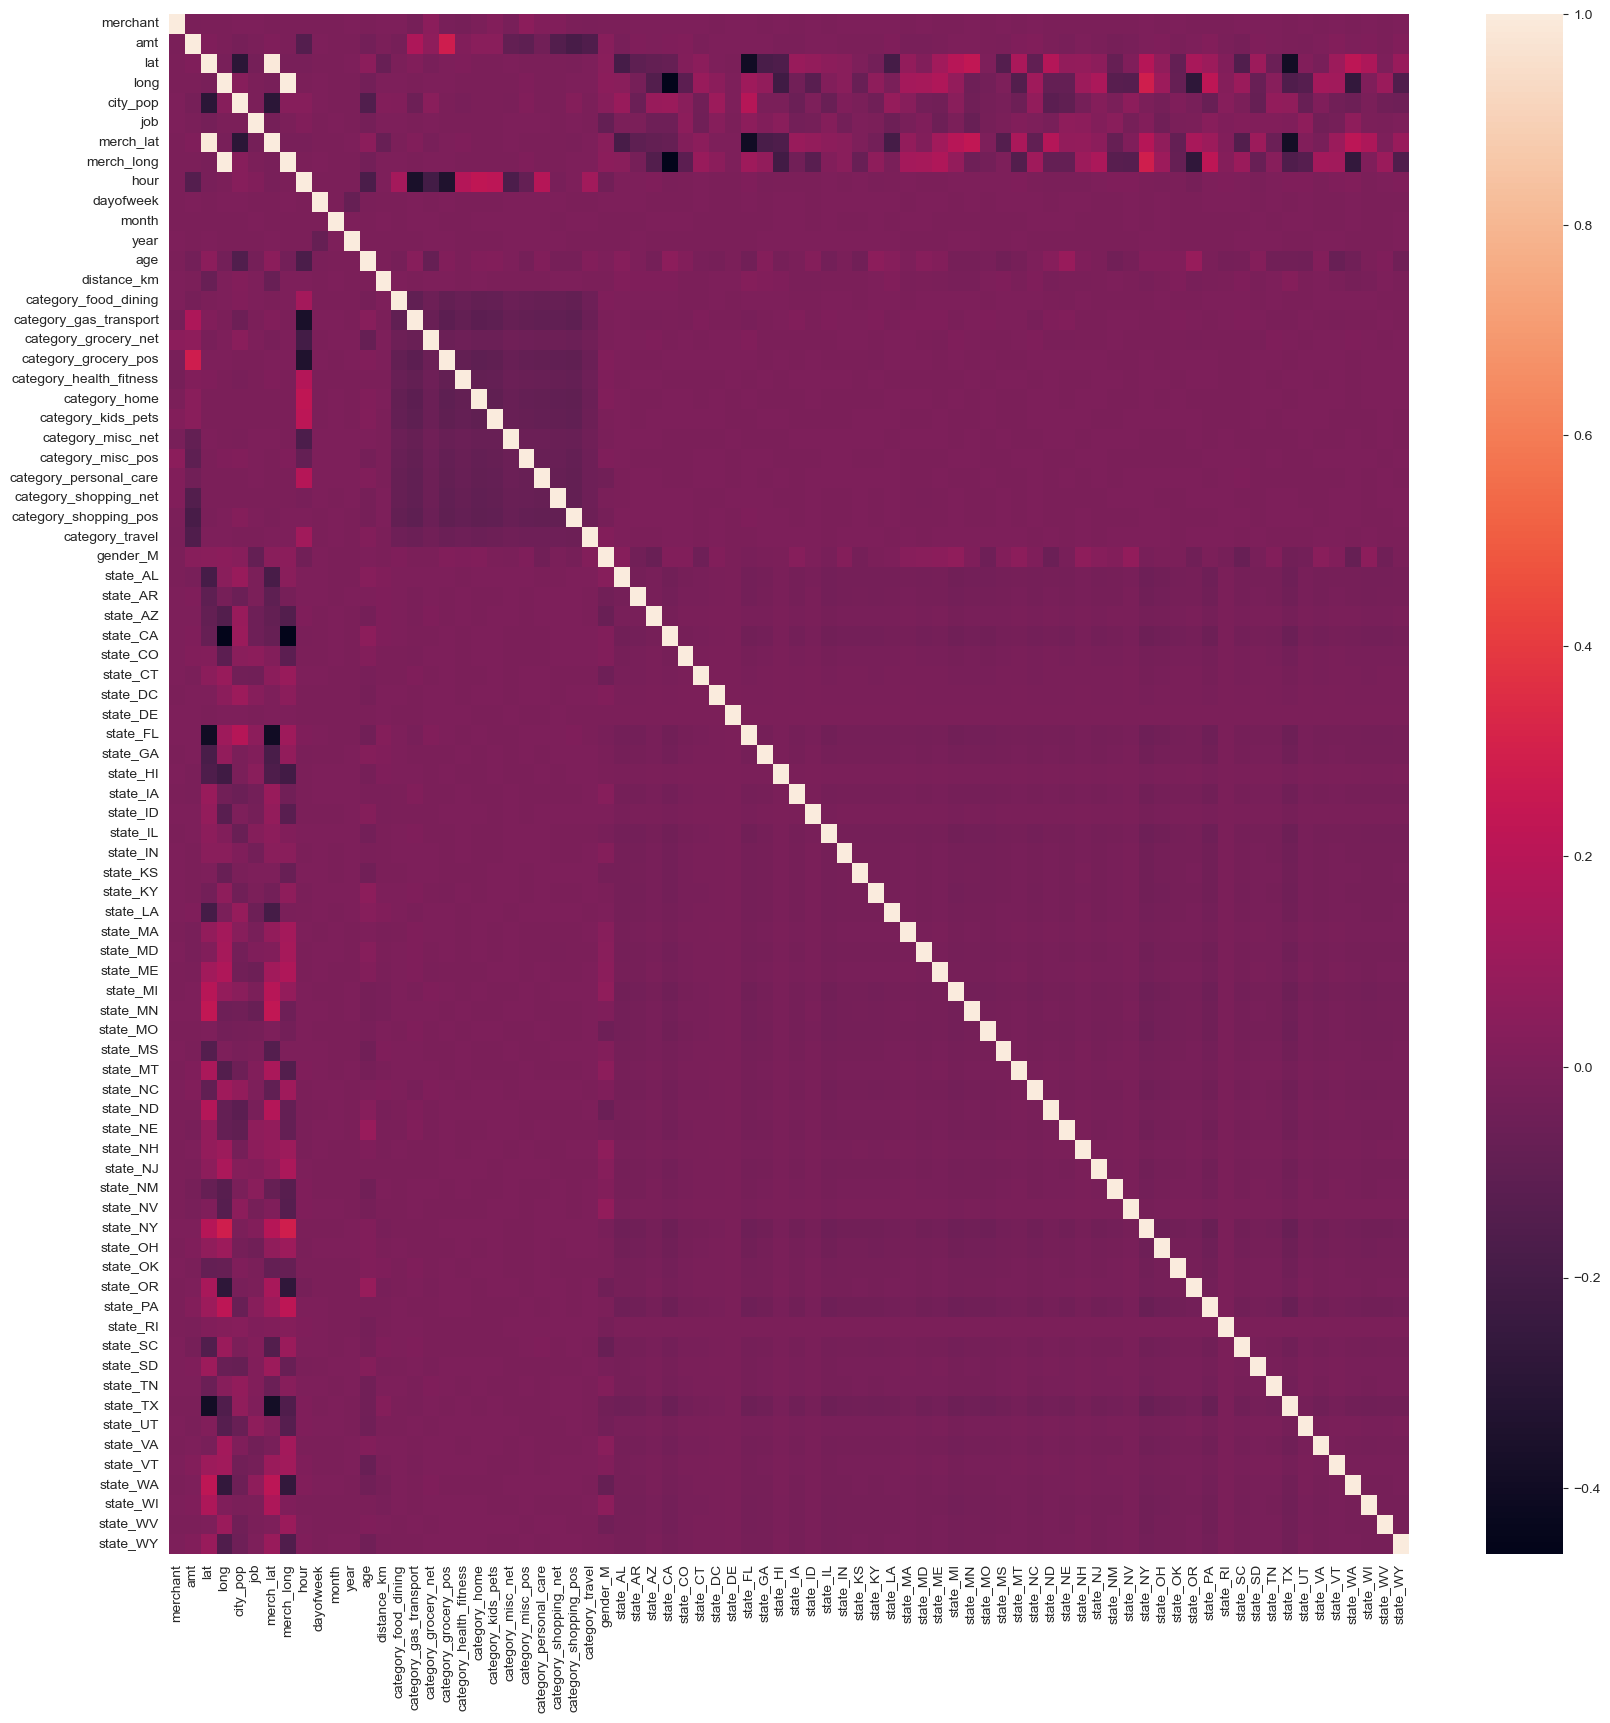

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr())
plt.show()

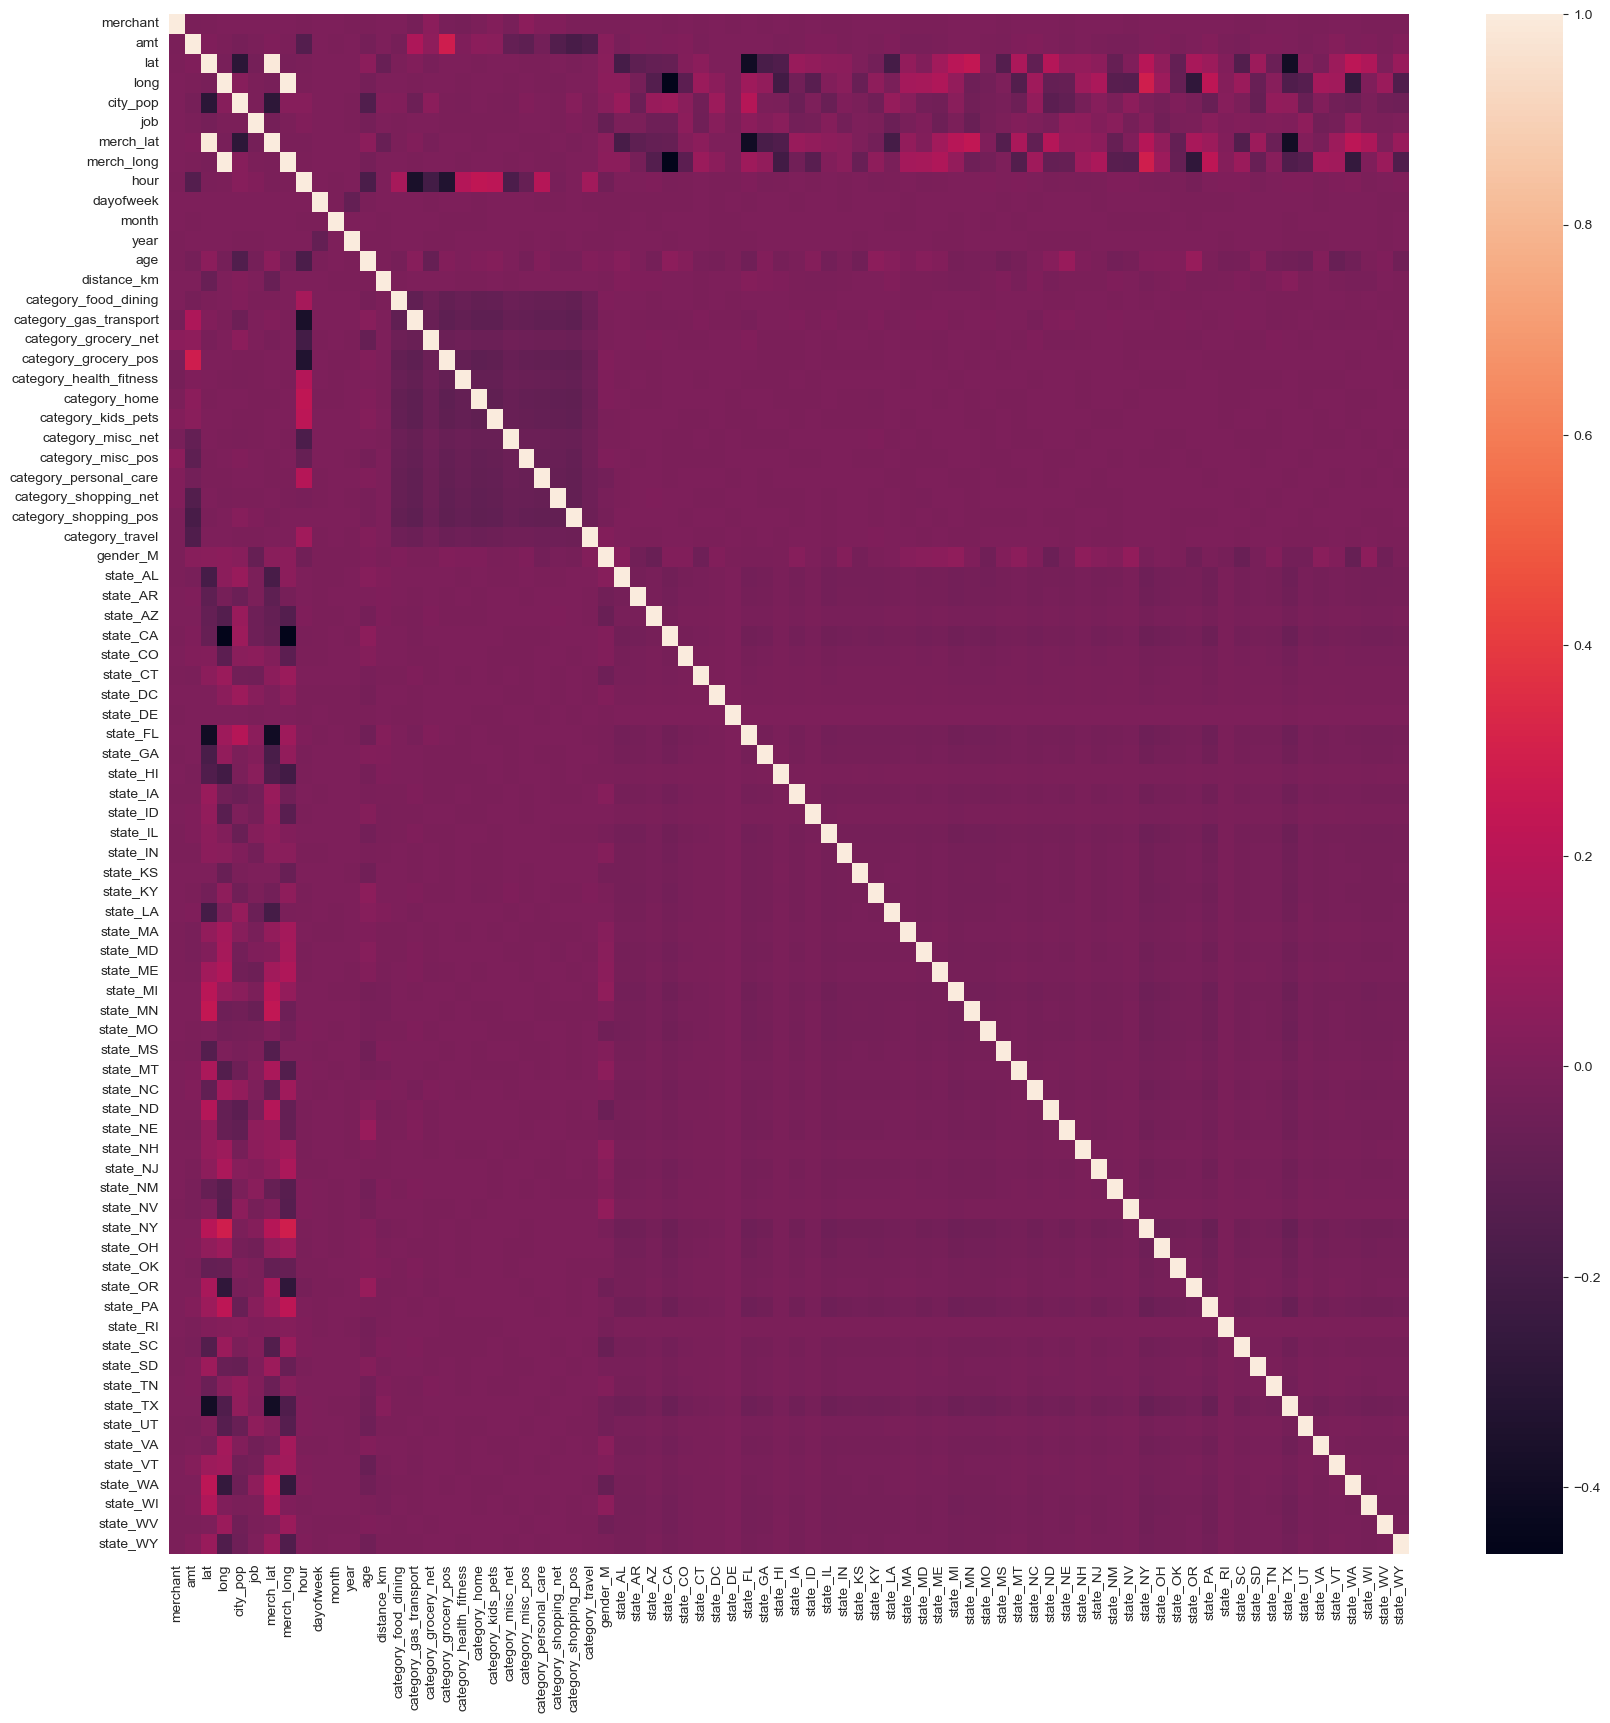

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(X_test.corr())
plt.show()

## Selección de variables 

In [62]:
X_train.shape

(1296675, 78)

In [63]:
X_test.shape

(555719, 78)

Tenemos muchas variables. Vamos a ejecutar un Random Forest para saber la importancia de cada una de ellas. Así podremos prescindir de las menos importantes y manejar unos conjuntos de datos de tamaño más razonable. 

In [64]:
rf = RandomForestClassifier(n_estimators = 25).fit(X_train, y_train)

variables = X_train.columns

for var in zip(variables, rf.feature_importances_):
    print(var)

('merchant', 0.030212822827189956)
('amt', 0.3939153946632764)
('lat', 0.02242018550479674)
('long', 0.023036136538892006)
('city_pop', 0.027194382518734486)
('job', 0.02364315208852331)
('merch_lat', 0.03760548608244612)
('merch_long', 0.038450044734488466)
('hour', 0.08717225877514549)
('dayofweek', 0.016938203747295166)
('month', 0.02183333343672038)
('year', 0.006803644730516736)
('age', 0.05579399704121443)
('distance_km', 0.03544727096419418)
('category_food_dining', 0.001476099939015571)
('category_gas_transport', 0.011472263737121586)
('category_grocery_net', 0.0014829076692007904)
('category_grocery_pos', 0.06286071965800734)
('category_health_fitness', 0.0014093461541517694)
('category_home', 0.001953182482704388)
('category_kids_pets', 0.0017212457038183549)
('category_misc_net', 0.011712635453814756)
('category_misc_pos', 0.008045289567265003)
('category_personal_care', 0.0013785743093658064)
('category_shopping_net', 0.014951615351172919)
('category_shopping_pos', 0.007199

In [65]:
df_importancias = pd.DataFrame({
    'Variable': variables,
    'Importancia': rf.feature_importances_
})

In [66]:
df_importancias.sort_values(by='Importancia', ascending=False)

,Variable,Importancia
1,amt,0.393915
8,hour,0.087172
17,category_grocery_pos,0.062861
12,age,0.055794
7,merch_long,0.038450
6,merch_lat,0.037605
13,distance_km,0.035447
0,merchant,0.030213
4,city_pop,0.027194
5,job,0.023643


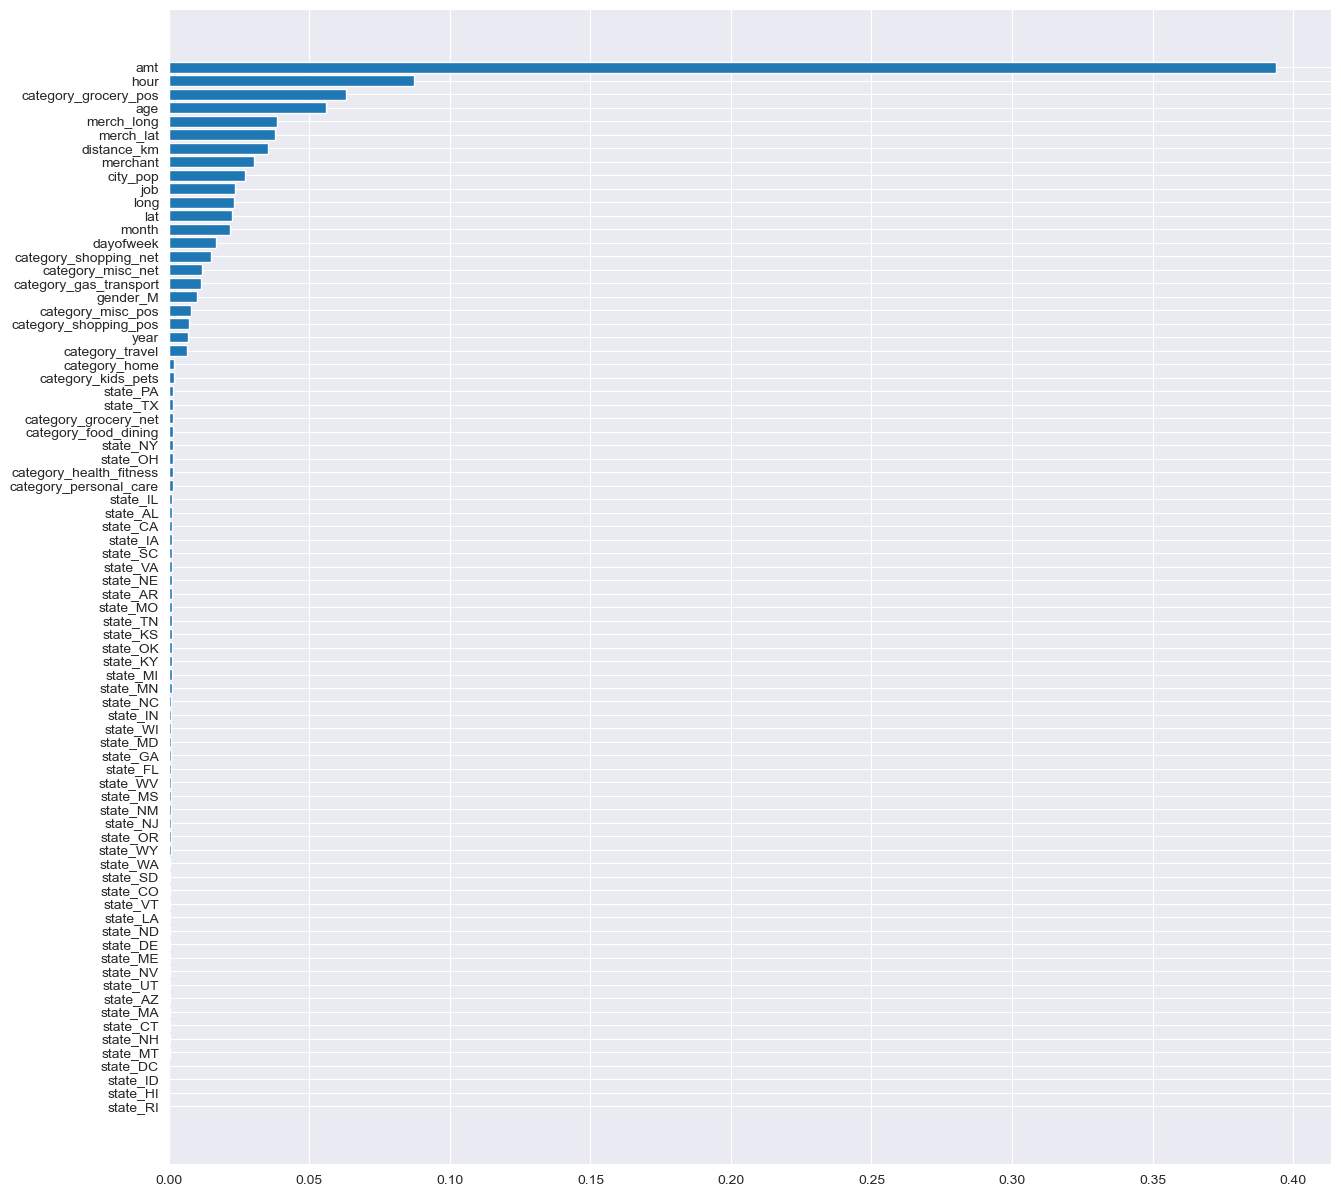

In [67]:
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=True)  

plt.figure(figsize=(15,15))
plt.barh(feature_importances.index,feature_importances.importance);

Vemos que la importancia de las variables correspondientes a los estados es muy baja, así que las vamos a eliminar del conjunto de datos. Nos quedamos con las 28 primeras variables del dfataframe.

In [68]:
seleccion_vars = df_importancias.iloc[0:28]

In [69]:
seleccion_vars

,Variable,Importancia
0,merchant,0.030213
1,amt,0.393915
2,lat,0.022420
3,long,0.023036
4,city_pop,0.027194
5,job,0.023643
6,merch_lat,0.037605
7,merch_long,0.038450
8,hour,0.087172
9,dayofweek,0.016938


Nos quedamos con las columnas seleccionadas de X_train y X_test.

In [70]:
lista_variables = list(seleccion_vars['Variable'])
lista_variables

['merchant',
 'amt',
 'lat',
 'long',
 'city_pop',
 'job',
 'merch_lat',
 'merch_long',
 'hour',
 'dayofweek',
 'month',
 'year',
 'age',
 'distance_km',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'gender_M']

In [71]:
X_train = X_train.filter(lista_variables)

In [72]:
X_test = X_test.filter(lista_variables)

Comprobamos que nos hemos quedado con las variables que nos interesan:

In [73]:
X_train.shape

(1296675, 28)

In [74]:
X_train.head(5)

,merchant,amt,lat,long,city_pop,job,merch_lat,merch_long,hour,dayofweek,month,year,age,distance_km,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
1606730,605,0.487621,33.374900,-99.847300,-1.294358,489,33.982824,-99.626096,4,5,10,2020,-0.554560,-0.188649,False,True,False,False,False,False,False,False,False,False,False,False,False,False
762160,598,-1.255550,33.977800,-86.559800,-0.025393,17,33.875221,-86.806611,18,4,11,2019,-0.209809,-1.739097,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1446803,67,-0.839319,37.622300,-97.313600,1.863015,464,37.682608,-97.540664,10,2,8,2020,2.490742,-1.889613,False,False,False,False,False,False,False,False,False,False,False,True,False,False
172336,397,-1.166550,42.958000,-77.308300,0.376977,115,42.039191,-77.065052,17,6,3,2019,1.226654,0.960313,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1364867,637,-0.306829,39.412500,-80.635200,-1.147740,74,40.259233,-81.285110,14,1,7,2020,0.077484,1.138608,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
X_train.columns

Index(['merchant', 'amt', 'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'hour', 'dayofweek', 'month', 'year', 'age', 'distance_km', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_M'], dtype='object')

In [76]:
X_test.shape

(555719, 28)

In [77]:
X_test.head(5)

,merchant,amt,lat,long,city_pop,job,merch_lat,merch_long,hour,dayofweek,month,year,age,distance_km,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
1503399,113,0.913882,33.977800,-86.559800,-0.027847,17,34.199595,-87.308746,14,1,9,2020,-0.208900,-0.097544,False,False,False,False,True,False,False,False,False,False,False,False,False,True
158457,137,-1.313384,34.124800,-117.903100,1.073994,84,33.508908,-117.208249,8,0,3,2019,-0.553684,0.611181,False,False,False,False,False,False,False,False,True,False,False,False,False,False
201199,341,-1.014406,34.032600,-82.202700,-0.420895,397,34.237480,-81.416569,18,5,4,2019,-0.611148,-0.007847,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1691368,502,-1.034213,47.537500,-95.994100,-0.861909,28,47.153645,-96.988681,7,0,11,2020,0.423204,0.348994,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1620696,359,0.818468,40.802700,-81.373900,1.551654,53,39.889279,-81.798750,3,4,10,2020,0.595596,1.088793,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [78]:
X_test.columns

Index(['merchant', 'amt', 'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'hour', 'dayofweek', 'month', 'year', 'age', 'distance_km', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_M'], dtype='object')

## Tratamiento de conjuntos de datos desbalanceados

### Random Over-Sampling

In [79]:
# Queremos que nos genere tantas muestras con fraude como las que hay sin fraude.

ROS = RandomOverSampler(sampling_strategy = 1)

In [80]:
X_resampled_ROS, y_resampled_ROS = ROS.fit_resample(X_train, y_train)

In [81]:
X_resampled_ROS.shape

(2579838, 28)

In [82]:
print(sorted(Counter(y_resampled_ROS).items()))

[(0, 1289919), (1, 1289919)]


### SMOTE

In [83]:
SMT = SMOTE(random_state=45, k_neighbors=5)

In [84]:
X_resampled_SMT, y_resampled_SMT = SMT.fit_resample(X_train, y_train)

In [85]:
X_resampled_SMT.shape

(2579838, 28)

In [86]:
print(sorted(Counter(y_resampled_SMT).items()))

[(0, 1289919), (1, 1289919)]


### ADASYN

In [87]:
ADA = ADASYN(random_state=45, n_neighbors=5)

In [88]:
X_resampled_ADA, y_resampled_ADA = ADA.fit_resample(X_train, y_train)

In [89]:
X_resampled_ADA.shape

(2577251, 28)

In [90]:
print(sorted(Counter(y_resampled_ADA).items()))

[(0, 1289919), (1, 1287332)]


# Modelos Supervisados

## Decision Tree

In [91]:
# Clasificador

dtc = DecisionTreeClassifier(random_state=0)

### Decision Tree con el conjunto de datos desbalanceado 

In [92]:
# Entrenamiento con el conjunto de datos original, desbalanceado

dtc.fit(X_train, y_train)

In [96]:
# Predicción a partir del conjunto de datos de prueba

y_pred_dtc = dtc.predict(X_test)

In [97]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

Accuracy:  0.9978928199323759
ROC AUC:  0.9066804666219136
F1 score:  0.8010871411584848
Recall:  0.8145077720207254
Precision:  0.7881016042780749

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.79      0.81      0.80      2895

    accuracy                           1.00    555719
   macro avg       0.89      0.91      0.90    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552190    634]
 [   537   2358]]


Obtenemos la **curva ROC** correspondiente a la predicción:

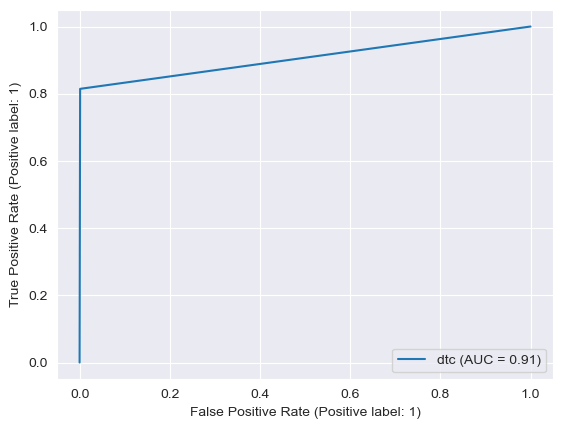

In [98]:
RocCurveDisplay.from_predictions(y_test, y_pred_dtc, name='dtc')
plt.show()

Al haber obtenido un **valor del AUC de 0,91**, la predicción realizada se considera **muy buena**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestro: 


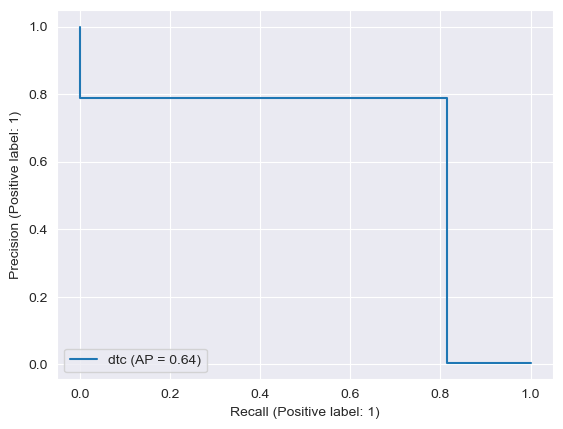

In [95]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dtc, name='dtc')
plt.show()

Al haber obtenido un **valor del AP de 0,64**, la predicción realizada se considera **buena**.  

### Decision Tree sobre el conjunto de datos con Random Over-Sampling

In [99]:
# Entrenamiento con el conjunto de datos balanceado con Random Over-Sampling 

dtc_ROS = dtc.fit(X_resampled_ROS, y_resampled_ROS)

In [100]:
# Predicción a partir del conjunto de datos de prueba

y_pred_dtc_ROS = dtc_ROS.predict(X_test)

In [101]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ROS))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_dtc_ROS))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ROS))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ROS))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ROS))
print ('\n clasification report:\n', classification_report(y_test, y_pred_dtc_ROS))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ROS))

Accuracy:  0.9980385770506317
ROC AUC:  0.8978197563437943
F1 score:  0.8088390038582952
Recall:  0.796545768566494
Precision:  0.8215176344852155

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.82      0.80      0.81      2895

    accuracy                           1.00    555719
   macro avg       0.91      0.90      0.90    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552323    501]
 [   589   2306]]


Obtenemos la **curva ROC** correspondiente a la predicción:

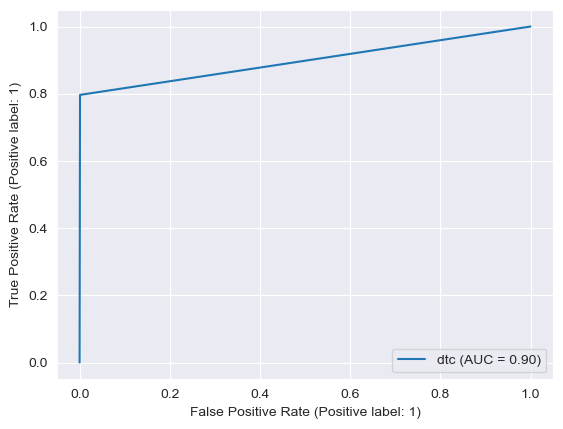

In [102]:
RocCurveDisplay.from_predictions(y_test, y_pred_dtc_ROS, name='dtc')
plt.show()

Al haber obtenido un **valor del AUC de 0,90**, la predicción realizada se considera **muy buena**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestro: 

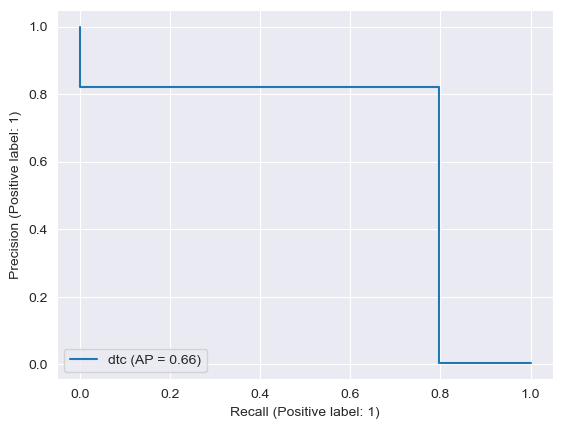

In [103]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dtc_ROS, name='dtc')
plt.show()

Al haber obtenido un **valor del AP de 0,66**, la predicción realizada se considera **buena**.  

### Decision Tree sobre el conjunto de datos con SMOTE

In [104]:
# Entrenamiento con el conjunto de datos balanceado con SMOTE 

dtc_SMT = dtc.fit(X_resampled_SMT, y_resampled_SMT)

In [105]:
# Predicción a partir del conjunto de datos de prueba

y_pred_dtc_SMT = dtc_SMT.predict(X_test)

In [106]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_SMT))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_dtc_SMT))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_SMT))
print ('Recall: ', recall_score(y_test, y_pred_dtc_SMT))
print ('Precision: ', precision_score(y_test, y_pred_dtc_SMT))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_SMT))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_SMT))

Accuracy:  0.992629368439805
ROC AUC:  0.9097045943057592
F1 score:  0.5386348276638884
Recall:  0.8259067357512954
Precision:  0.39963229149256224

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    552824
           1       0.40      0.83      0.54      2895

    accuracy                           0.99    555719
   macro avg       0.70      0.91      0.77    555719
weighted avg       1.00      0.99      0.99    555719


 confussion matrix:
 [[549232   3592]
 [   504   2391]]


Obtenemos la **curva ROC** correspondiente a la predicción:

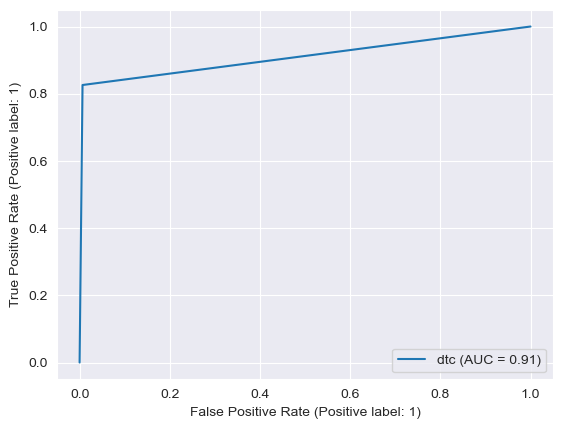

In [107]:
RocCurveDisplay.from_predictions(y_test, y_pred_dtc_SMT, name='dtc')
plt.show()

Al haber obtenido un **valor del AUC de 0,91**, la predicción realizada se considera **muy buena**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestro: 

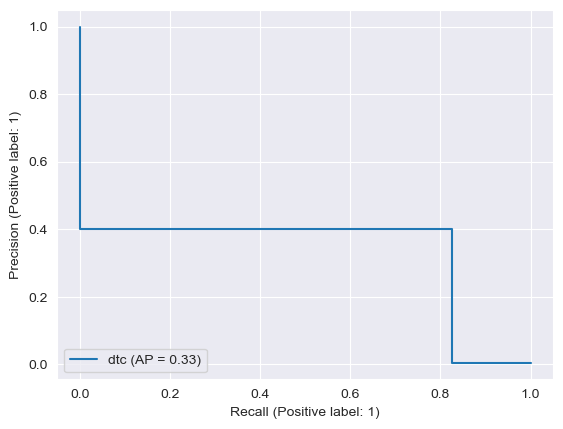

In [108]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dtc_SMT, name='dtc')
plt.show()

Al haber obtenido un **valor del AP de 0,33**, la predicción realizada se considera **regular**. 

### Decision Tree sobre el conjunto de datos con ADASYN

In [109]:
# Entrenaimento con el conjunto de datos balanceado con ADASYN

dtc_ADA = dtc.fit(X_resampled_ADA, y_resampled_ADA)

In [110]:
# Predicción a partir del conjunto de datos de prueba

y_pred_dtc_ADA = dtc_ADA.predict(X_test)

In [111]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ADA))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_dtc_ADA))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ADA))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ADA))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ADA))
print ('\n clasification report:\n', classification_report(y_test, y_pred_dtc_ADA))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ADA))

Accuracy:  0.9926923499106562
ROC AUC:  0.9050974575835922
F1 score:  0.5379451587211287
Recall:  0.816580310880829
Precision:  0.4010858500169664

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    552824
           1       0.40      0.82      0.54      2895

    accuracy                           0.99    555719
   macro avg       0.70      0.91      0.77    555719
weighted avg       1.00      0.99      0.99    555719


 confussion matrix:
 [[549294   3530]
 [   531   2364]]



Obtenemos la **curva ROC** correspondiente a la predicción:

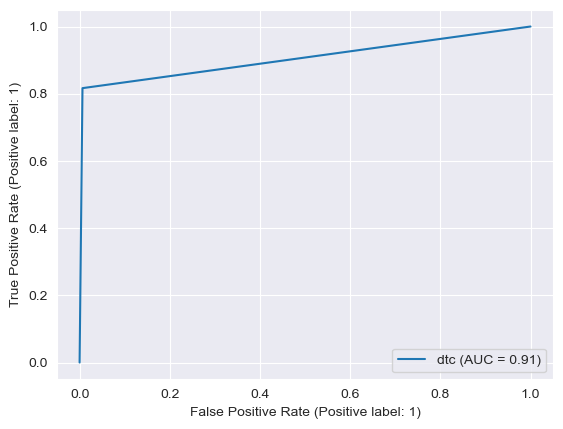

In [112]:
RocCurveDisplay.from_predictions(y_test, y_pred_dtc_ADA, name='dtc')
plt.show()

Al haber obtenido un **valor del AUC de 0,91**, la predicción realizada se considera **muy buena**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestro: 

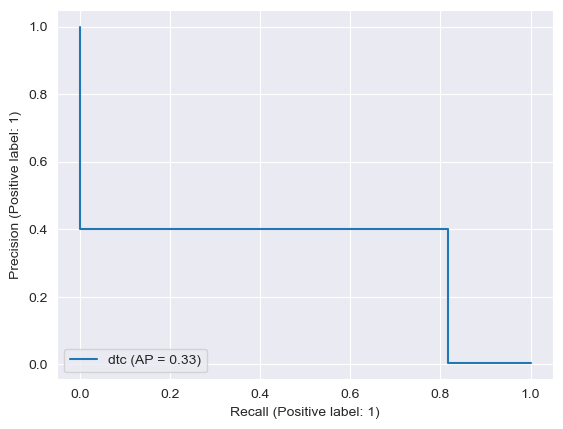

In [113]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dtc_ADA, name='dtc')
plt.show()

Al haber obtenido un **valor del AP de 0,33**, la predicción realizada se considera **regular**. 

## Random Forest

In [86]:
# Clasificador

rf = RandomForestClassifier(n_estimators = 25)

### Random Forest Con el conjunto de datos desbalanceado 

In [114]:
# Con el conjunto de datos desbalanceado

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25)

In [115]:
# Predicción a partir del conjunto de datos de prueba

y_pred_rf = rf.predict(X_test)

In [116]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9985712203469739
ROC AUC:  0.8735190538206128
F1 score:  0.844921875
Recall:  0.7471502590673575
Precision:  0.9721348314606741

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.97      0.75      0.84      2895

    accuracy                           1.00    555719
   macro avg       0.99      0.87      0.92    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552762     62]
 [   732   2163]]


Obtenemos la **curva ROC** correspondiente a la predicción:

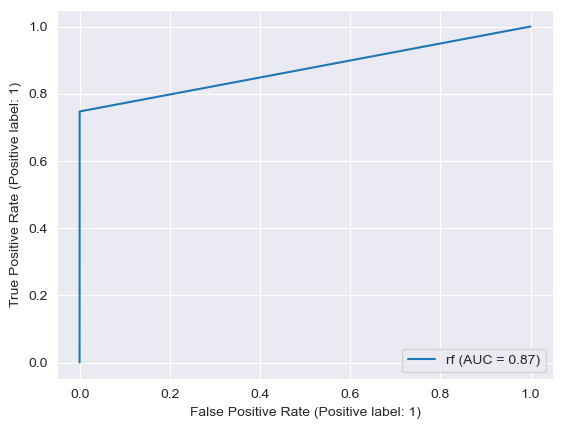

In [117]:
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name='rf')
plt.show()

Al haber obtenido un **valor del AUC de 0,87**, la predicción realizada se considera **buena**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados

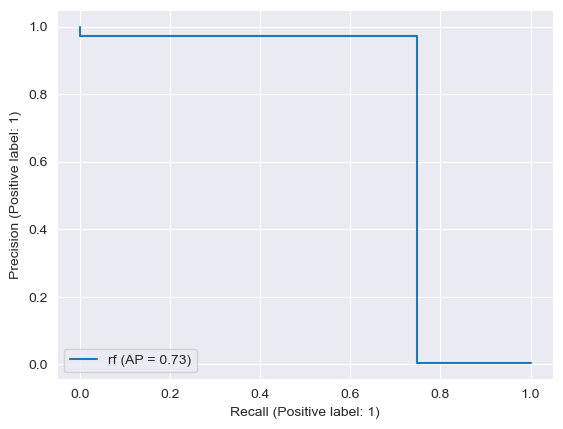

In [118]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name='rf')
plt.show()

Al haber obtenido un **valor del AP de 0,73**, la predicción realizada se considera **buena**.  

### Random Forest sobre conjunto de datos con Random Over-Sampling

In [120]:
# Entrenamiento con el conjunto de datos balanceado con Randon Over_Sampling

rf_ROS = rf.fit(X_resampled_ROS, y_resampled_ROS)

In [121]:
# Predicción a partir del conjunto de datos de prueba

y_pred_rf_ROS = rf_ROS.predict(X_test)

In [122]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ROS))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_rf_ROS))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ROS))
print ('Recall: ', recall_score(y_test, y_pred_rf_ROS))
print ('Precision: ', precision_score(y_test, y_pred_rf_ROS))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ROS))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ROS))

Accuracy:  0.998686386465102
ROC AUC:  0.8909294580213757
F1 score:  0.8611639406618486
Recall:  0.7820379965457686
Precision:  0.958104104951333

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.96      0.78      0.86      2895

    accuracy                           1.00    555719
   macro avg       0.98      0.89      0.93    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552725     99]
 [   631   2264]]


Obtenemos la **curva ROC** correspondiente a la predicción:

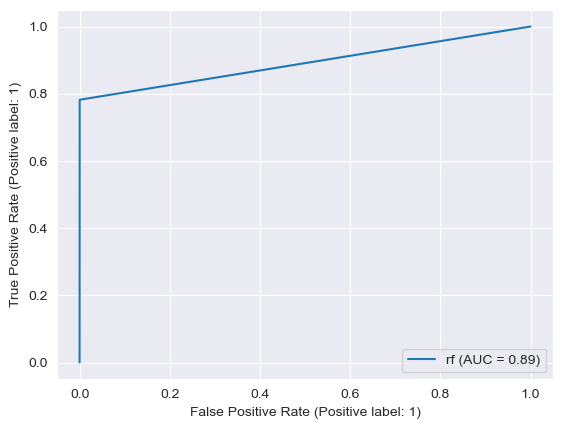

In [123]:
RocCurveDisplay.from_predictions(y_test, y_pred_rf_ROS, name='rf')
plt.show()

Al haber obtenido un **valor del AUC de 0,89**, la predicción realizada se considera **buena**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados

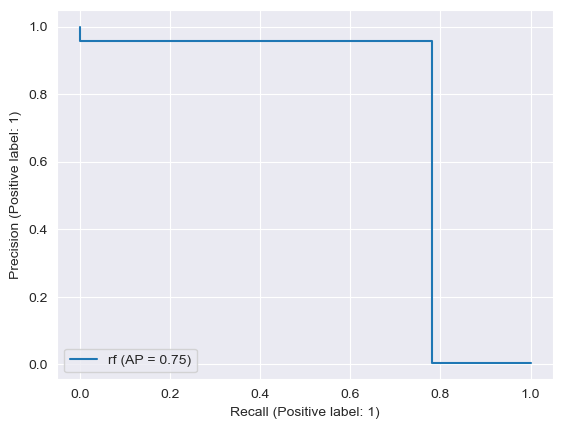

In [124]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf_ROS, name='rf')
plt.show()

Al haber obtenido un **valor del AP de 0,75**, la predicción realizada se considera **buena**.  

### Random Forest sobre conjunto de datos con SMOTE

In [125]:
# Entrenamiento con el conjunto de datos balanceado con SMOTE

rf_SMT = rf.fit(X_resampled_SMT, y_resampled_SMT)

In [126]:
# Predicción a partir del conjunto de datos de prueba

y_pred_rf_SMT = rf_SMT.predict(X_test)

In [127]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_SMT))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_rf_SMT))
print ('F1 score: ', f1_score(y_test, y_pred_rf_SMT))
print ('Recall: ', recall_score(y_test, y_pred_rf_SMT))
print ('Precision: ', precision_score(y_test, y_pred_rf_SMT))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_SMT))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_SMT))

Accuracy:  0.9974267570480765
ROC AUC:  0.8928734520022762
F1 score:  0.761189044756179
Recall:  0.7872193436960276
Precision:  0.736825088910443

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.74      0.79      0.76      2895

    accuracy                           1.00    555719
   macro avg       0.87      0.89      0.88    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552010    814]
 [   616   2279]]


Obtenemos la **curva ROC** correspondiente a la predicción:

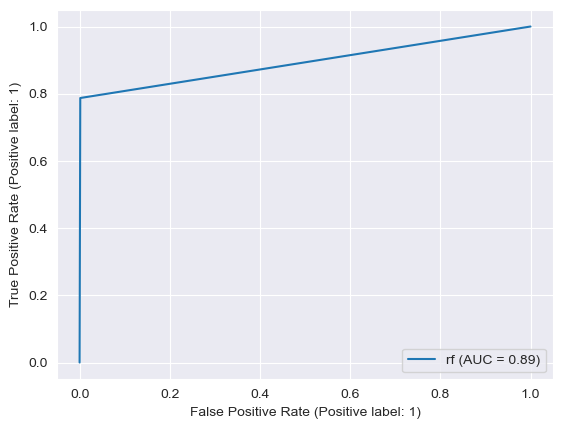

In [128]:
RocCurveDisplay.from_predictions(y_test, y_pred_rf_SMT, name='rf')
plt.show()

Al haber obtenido un **valor del AUC de 0,89**, la predicción realizada se considera **buena**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados

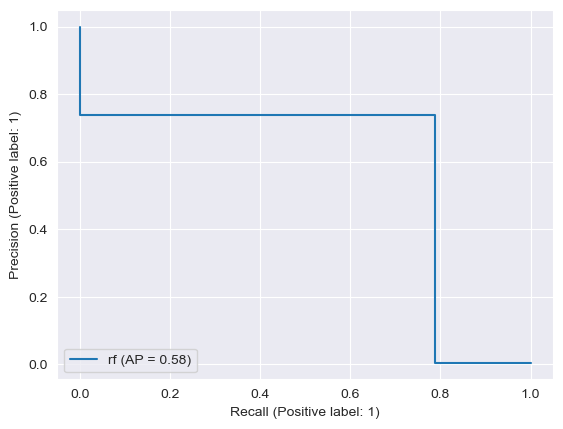

In [129]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf_SMT, name='rf')
plt.show()

Al haber obtenido un **valor del AP de 0,58**, la predicción realizada se considera **buena**. 

### Random Forest sobre conjunto de datos con ADASYN

In [130]:
# Entrenamiento con el conjunto de datos balanceado con ADASYN

rf_ADA = rf.fit(X_resampled_ADA, y_resampled_ADA)

In [131]:
# Predicción a partir del conjunto de datos de prueba

y_pred_rf_ADA = rf_ADA.predict(X_test)

In [132]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ADA))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_rf_ADA))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ADA))
print ('Recall: ', recall_score(y_test, y_pred_rf_ADA))
print ('Precision: ', precision_score(y_test, y_pred_rf_ADA))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ADA))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ADA))

Accuracy:  0.9973493798124592
ROC AUC:  0.887680347041213
F1 score:  0.7533076536593536
Recall:  0.7768566493955095
Precision:  0.7311443433029909

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.73      0.78      0.75      2895

    accuracy                           1.00    555719
   macro avg       0.86      0.89      0.88    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[551997    827]
 [   646   2249]]


Obtenemos la **curva ROC** correspondiente a la predicción:

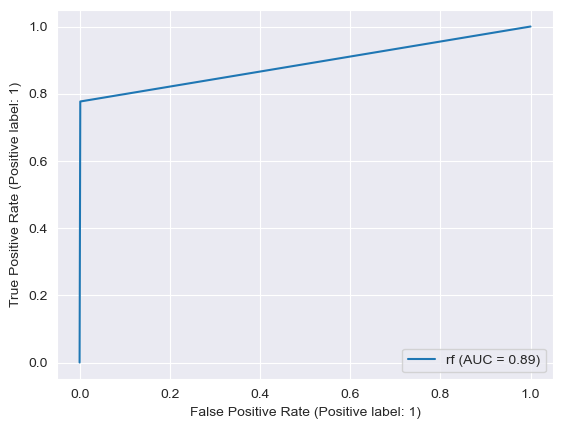

In [133]:
RocCurveDisplay.from_predictions(y_test, y_pred_rf_ADA, name='rf')
plt.show()

Al haber obtenido un **valor del AUC de 0,89**, la predicción realizada se considera **buena**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados

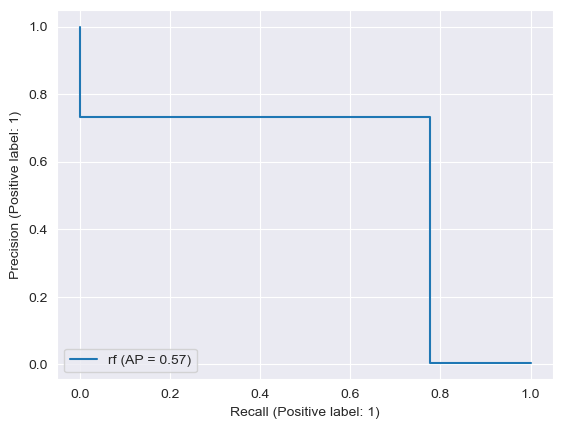

In [134]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf_ADA, name='rf')
plt.show()

Al haber obtenido un **valor del AP de 0,57**, la predicción realizada se considera **buena**.  

## XGBoost

In [113]:
# Clasificador

xgb = XGBClassifier(random_state=42)

### XGBoost Con el conjunto de datos desbalanceado 

In [131]:
# Entrenamiento con el conjunto de datos original, desbalanceado

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [132]:
# Predicción a partir del conjunto de datos de prueba

y_pred_xgb = xgb.predict(X_test)

In [133]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_xgb))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_xgb))
print ('F1 score: ', f1_score(y_test, y_pred_xgb))
print ('Recall: ', recall_score(y_test, y_pred_xgb))
print ('Precision: ', precision_score(y_test, y_pred_xgb))
print ('\n clasification report:\n', classification_report(y_test,y_pred_xgb))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_xgb))

Accuracy:  0.9988681329952728
ROC AUC:  0.9082015196358909
F1 score:  0.8825835355609484
Recall:  0.816580310880829
Precision:  0.9601949634443542

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.96      0.82      0.88      2895

    accuracy                           1.00    555719
   macro avg       0.98      0.91      0.94    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552726     98]
 [   531   2364]]


Obtenemos la **curva ROC** correspondiente a la predicción:

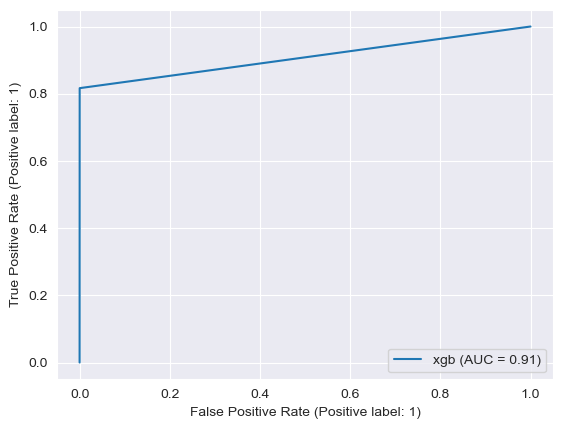

In [148]:
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, name='xgb')
plt.show()

Al haber obtenido un **valor del AUC de 0,91**, la predicción realizada se considera **muy buena**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestro: 

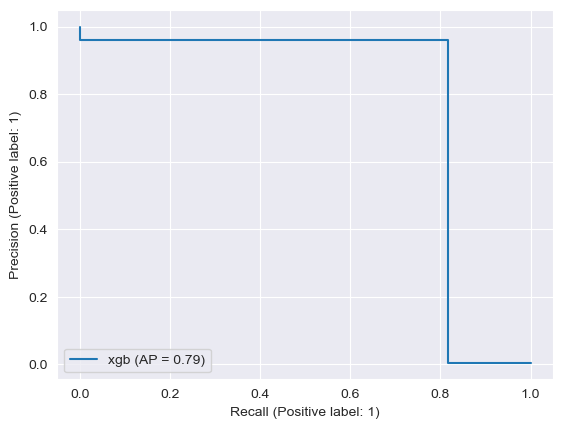

In [151]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, name='xgb')
plt.show()

Al haber obtenido un **valor del AP de 0,79**, la predicción realizada se considera **buena**.  

### XGBoost sobre el conjunto de datos con Random Over-Sampling

In [120]:
# Entrenamiento con conjunto de datos tratado con Random Over-sampling 

xgb_ROS = xgb.fit(X_resampled_ROS, y_resampled_ROS)

In [121]:
# Predicción a partir del conjunto de datos de prueba

y_pred_xgb_ROS = xgb_ROS.predict(X_test)

In [125]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_xgb_ROS))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_xgb_ROS))
print ('F1 score: ', f1_score(y_test, y_pred_xgb_ROS))
print ('Recall: ', recall_score(y_test, y_pred_xgb_ROS))
print ('Precision: ', precision_score(y_test, y_pred_xgb_ROS))
print ('\n clasification report:\n', classification_report(y_test,y_pred_xgb_ROS))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_xgb_ROS))

Accuracy:  0.9934373307372971
ROC AUC:  0.9726484843892887
F1 score:  0.6017254559353501
Recall:  0.9516407599309153
Precision:  0.4399552858511658

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    552824
           1       0.44      0.95      0.60      2895

    accuracy                           0.99    555719
   macro avg       0.72      0.97      0.80    555719
weighted avg       1.00      0.99      0.99    555719


 confussion matrix:
 [[549317   3507]
 [   140   2755]]


Obtenemos la **curva ROC** correspondiente a la predicción:

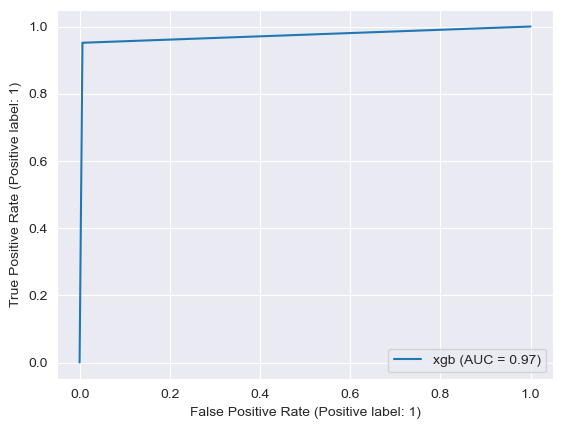

In [149]:
RocCurveDisplay.from_predictions(y_test, y_pred_xgb_ROS, name='xgb')
plt.show()

Al haber obtenido un **valor del AUC de 0,97**, la predicción realizada se considera **excelente**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestro: 


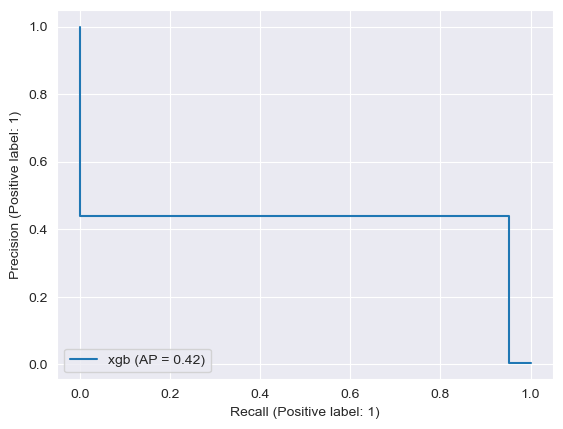

In [150]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb_ROS, name='xgb')
plt.show()

Al haber obtenido un **valor del AP de 0,42**, la predicción realizada se considera **regular**. 

### XGBoost sobre el conjunto de datos con SMOTE

In [127]:
# Entrenamiento con conjunto de datos tratado con SMOTE

xgb_SMT = xgb.fit(X_resampled_SMT, y_resampled_SMT)

In [128]:
# Predicción a partir del conjunto de datos de prueba

y_pred_xgb_SMT = xgb_SMT.predict(X_test)

In [129]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_xgb_SMT))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_xgb_SMT))
print ('F1 score: ', f1_score(y_test, y_pred_xgb_SMT))
print ('Recall: ', recall_score(y_test, y_pred_xgb_SMT))
print ('Precision: ', precision_score(y_test, y_pred_xgb_SMT))
print ('\n clasification report:\n', classification_report(y_test, y_pred_xgb_SMT))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_xgb_SMT))

Accuracy:  0.9924224293212937
ROC AUC:  0.9351998444813563
F1 score:  0.5467656872241954
Recall:  0.8773747841105354
Precision:  0.3971232020012508

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    552824
           1       0.40      0.88      0.55      2895

    accuracy                           0.99    555719
   macro avg       0.70      0.94      0.77    555719
weighted avg       1.00      0.99      0.99    555719


 confussion matrix:
 [[548968   3856]
 [   355   2540]]


Obtenemos la **curva ROC** correspondiente a la predicción:

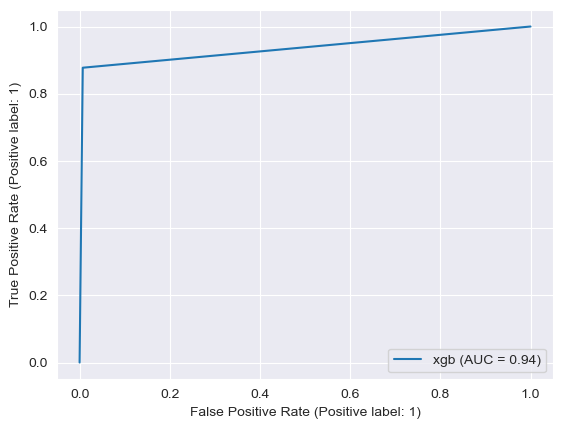

In [152]:
RocCurveDisplay.from_predictions(y_test, y_pred_xgb_SMT, name='xgb')
plt.show()

Al haber obtenido un **valor del AUC de 0,94**, la predicción realizada se considera **muy buena**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestro:

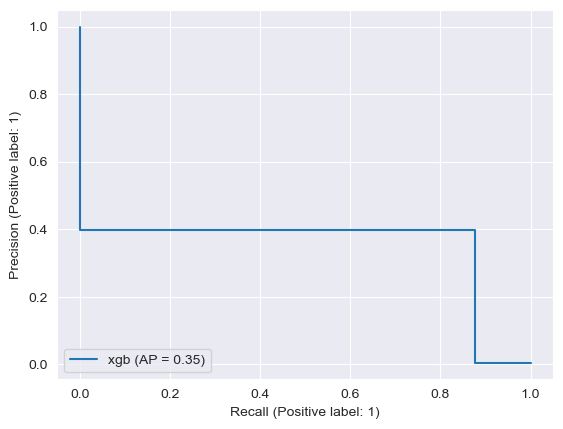

In [153]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb_SMT, name='xgb')
plt.show()

Al haber obtenido un **valor del AP de 0,35**, la predicción realizada se considera **regular**. 

### XGBoost sobre el conjunto de datos con ADASYN

In [135]:
# Entrenamiento con conjunto de datos tratado con ADASYN

xgb_ADA = xgb.fit(X_resampled_ADA, y_resampled_ADA)

In [136]:
# Predicción a partir del conjunto de datos de prueba

y_pred_xgb_ADA = xgb_ADA.predict(X_test)

In [137]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_xgb_ADA))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_xgb_ADA))
print ('F1 score: ', f1_score(y_test, y_pred_xgb_ADA))
print ('Recall: ', recall_score(y_test, y_pred_xgb_ADA))
print ('Precision: ', precision_score(y_test, y_pred_xgb_ADA))
print ('\n clasification report:\n', classification_report(y_test, y_pred_xgb_ADA))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_xgb_ADA))

Accuracy:  0.9910800242568636
ROC AUC:  0.93246344153431
F1 score:  0.5049435733546389
Recall:  0.8732297063903282
Precision:  0.35515594268052825

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    552824
           1       0.36      0.87      0.50      2895

    accuracy                           0.99    555719
   macro avg       0.68      0.93      0.75    555719
weighted avg       1.00      0.99      0.99    555719


 confussion matrix:
 [[548234   4590]
 [   367   2528]]


Obtenemos la **curva ROC** correspondiente a la predicción:

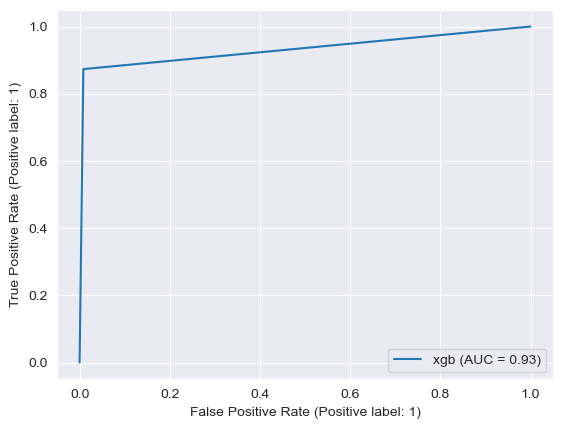

In [154]:
RocCurveDisplay.from_predictions(y_test, y_pred_xgb_ADA, name='xgb')
plt.show()

Al haber obtenido un **valor del AUC de 0,93**, la predicción realizada se considera **muy buena**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestro:

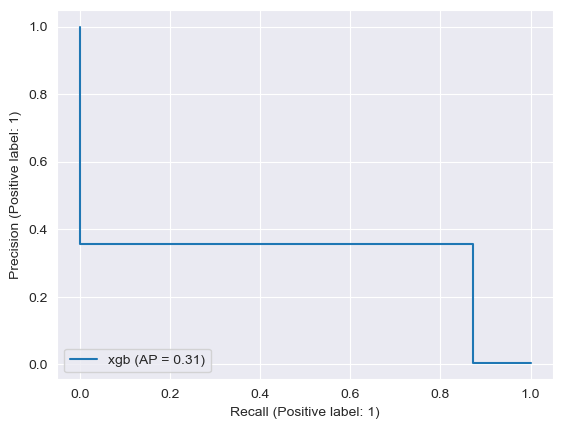

In [155]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb_ADA, name='xgb')
plt.show()

Al haber obtenido un **valor del AP de 0,31**, la predicción realizada se considera **regular**.

## Cuadro resumen algoritmos clasificación  

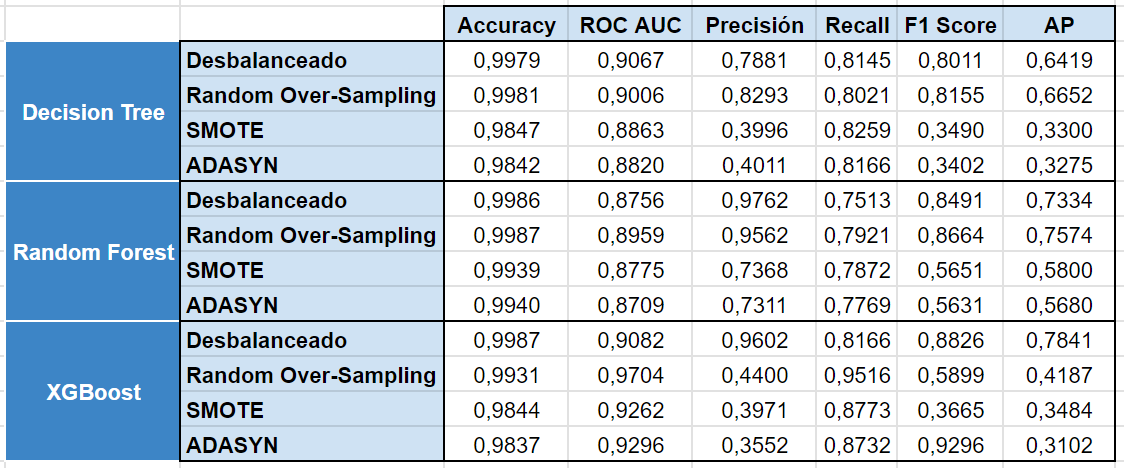

Vamos a hacer ajuste de hiperparámetros par aver si conseguimos mejorar las puntuaciones.

## Ajuste de hiperparámetros con validación cruzada

### XGBoost

Ajustamos los parámetros y utilizamos **early_stopping_rounds=50** para que el entrenamiento pare si hay 50 iteraciones sin decremento del error:   

In [133]:
xgb = XGBClassifier(
 learning_rate =0.8,
 n_estimators=61,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=42,
 early_stopping_rounds=50,
 eval_metric='aucpr')

In [134]:
# Entrenamiento con el conjunto de datos original, desbalanceado

xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-aucpr:0.68954	validation_1-aucpr:0.68839
[1]	validation_0-aucpr:0.79898	validation_1-aucpr:0.79981
[2]	validation_0-aucpr:0.82035	validation_1-aucpr:0.82146
[3]	validation_0-aucpr:0.82455	validation_1-aucpr:0.82692
[4]	validation_0-aucpr:0.84049	validation_1-aucpr:0.84079
[5]	validation_0-aucpr:0.84376	validation_1-aucpr:0.84254
[6]	validation_0-aucpr:0.84877	validation_1-aucpr:0.84596
[7]	validation_0-aucpr:0.86897	validation_1-aucpr:0.86487
[8]	validation_0-aucpr:0.80874	validation_1-aucpr:0.80362
[9]	validation_0-aucpr:0.88161	validation_1-aucpr:0.85942
[10]	validation_0-aucpr:0.86921	validation_1-aucpr:0.85027
[11]	validation_0-aucpr:0.86740	validation_1-aucpr:0.84928
[12]	validation_0-aucpr:0.90427	validation_1-aucpr:0.88811
[13]	validation_0-aucpr:0.91041	validation_1-aucpr:0.89292
[14]	validation_0-aucpr:0.91388	validation_1-aucpr:0.89639
[15]	validation_0-aucpr:0.91455	validation_1-aucpr:0.89601
[16]	validation_0-aucpr:0.91974	validation_1-aucpr:0.90106
[17]	va

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=61, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

Vemos cuál ha sido la mejor iteración:

In [135]:
xgb.best_iteration

53

Imprimimos los resultados:

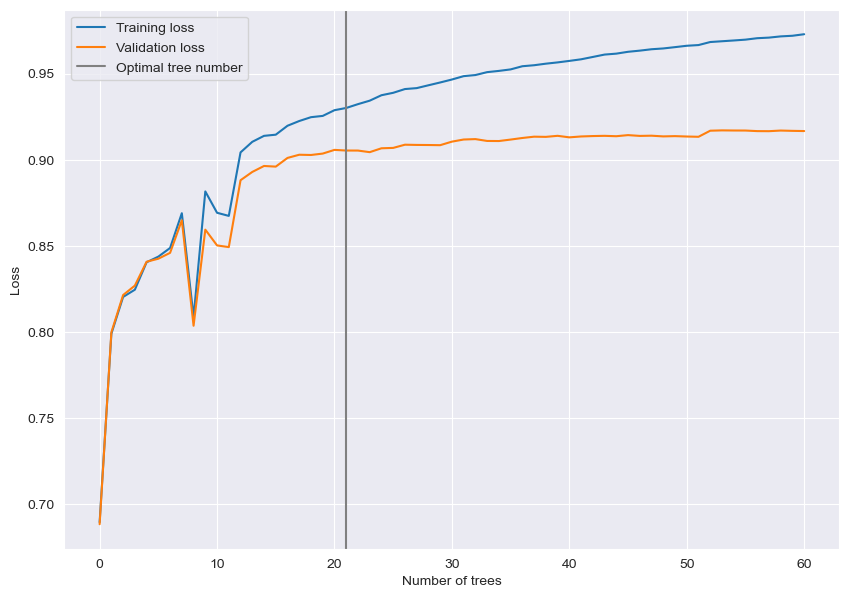

In [137]:
results = xgb.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["aucpr"], label="Training loss")
plt.plot(results["validation_1"]["aucpr"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend();

Vemos que el **número óptimo de árboles es 22**.  

Vamos a tener en cuenta estos valores para la mejora de hiperparámetros con validación cruzada. 

Vamos a utilizar los siguientes parámetros, tratando de ajustar **max_depth** y **min_child_weight**:

In [138]:
parameters_xgb = {
             'learning_rate': [0.8],
             'n_estimators': [22],
             'max_depth': [6, 7, 8],
             'min_child_weight': [4, 5, 6],
             'gamma': [0],
             'subsample': [0.8],
             'colsample_bytree': [0.8],
             'objective': ['binary:logistic'],
             'nthread': [4],
             'scale_pos_weight': [1],
             'seed': [42]
}  

In [139]:
rscv_xgb = RandomizedSearchCV(estimator=xgb, 
                              param_distributions=parameters_xgb,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              scoring='average_precision',
                              n_jobs=10,
                              n_iter=50)

#### Optimización con datos originales (desbalanceados)

In [141]:
%%time
rscv_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[0]	validation_0-aucpr:0.73467
[1]	validation_0-aucpr:0.85149
[2]	validation_0-aucpr:0.88162
[3]	validation_0-aucpr:0.88222
[4]	validation_0-aucpr:0.89378
[5]	validation_0-aucpr:0.89597
[6]	validation_0-aucpr:0.89887
[7]	validation_0-aucpr:0.90722
[8]	validation_0-aucpr:0.91304
[9]	validation_0-aucpr:0.91412
[10]	validation_0-aucpr:0.91338
[11]	validation_0-aucpr:0.91550
[12]	validation_0-aucpr:0.91612
[13]	validation_0-aucpr:0.91582
[14]	validation_0-aucpr:0.91450
[15]	validation_0-aucpr:0.91441
[16]	validation_0-aucpr:0.91292
[17]	validation_0-aucpr:0.91245
[18]	validation_0-aucpr:0.91317
[19]	validation_0-aucpr:0.91332
[20]	validation_0-aucpr:0.91307
[21]	validation_0-aucpr:0.91378
CPU times: total: 2min 30s
Wall time: 21min 8s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8,
                                           early_stopping_rounds=50,
                                           enable_categorical=False,
                                           eval_metric='aucpr',
                                           feature_types=None, gamma=0,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0....
                                           nthread=4, num_parallel_tree=None,
                                           predictor=None, ...),
                   n_iter=50, n_jobs=10,
                   param_distributions={'colsample_bytree': [0.8], 'gamma': [0],
                                        'learning_rate': [0.8],
                                        'max_depth': [6, 7, 8],
                                        'min_child_weight': [4, 5, 6],
                                        'n_estimators': [22], 'nthread': [4],
                                        'objective': ['binary:logistic'],
                                        'scale_pos_weight': [1], 'seed': [42],
                                        'subsample': [0.8]},
                   return_train_score=True, scoring='average_precision',
                   verbose=1)

In [142]:
rscv_xgb.best_score_

0.9132010490416794

In [143]:
xgb_best_model = rscv_xgb.best_estimator_
xgb_best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=22, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [144]:
# Realizamos las predicciones sobre X_test

y_pred_best_xgb = xgb_best_model.predict(X_test)

In [145]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_best_xgb))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_best_xgb))
print ('F1 score: ', f1_score(y_test, y_pred_best_xgb))
print ('Recall: ', recall_score(y_test, y_pred_best_xgb))
print ('Precision: ', precision_score(y_test, y_pred_best_xgb))
print ('\n clasification report:\n', classification_report(y_test, y_pred_best_xgb))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_best_xgb))

Accuracy:  0.9986989827592723
ROC AUC:  0.9002133738835498
F1 score:  0.8650867699197612
Recall:  0.8006908462867012
Precision:  0.9407467532467533

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.94      0.80      0.87      2895

    accuracy                           1.00    555719
   macro avg       0.97      0.90      0.93    555719
weighted avg       1.00      1.00      1.00    555719


 confussion matrix:
 [[552678    146]
 [   577   2318]]


Obtenemos la **curva ROC** correspondiente a la predicción:

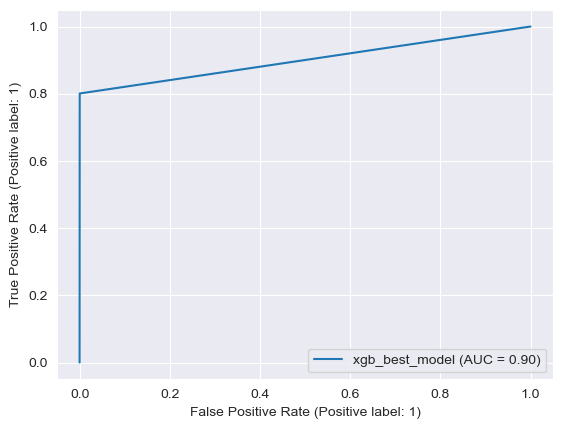

In [146]:
RocCurveDisplay.from_predictions(y_test, y_pred_best_xgb, name='xgb_best_model')
plt.show()

Al haber obtenido un **valor del AUC de 0,91**, la predicción realizada se considera **muy buena**. 

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestro:

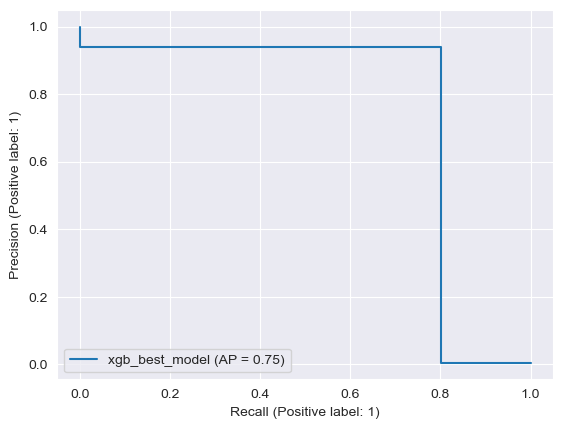

In [147]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_best_xgb, name='xgb_best_model')
plt.show()

Al haber obtenido un **valor del AP de 0,75**, la predicción realizada se considera **buena**, pero ha empeorado con respecto a la inicial que presentaba un valor del AP de 0,79.

#### Optimización con datos de Random Over-Sampling

In [151]:
%%time
rscv_xgb.fit(X_resampled_ROS, y_resampled_ROS, eval_set=[(X_test, y_test)])

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[0]	validation_0-aucpr:0.29850
[1]	validation_0-aucpr:0.74226
[2]	validation_0-aucpr:0.77610
[3]	validation_0-aucpr:0.72982
[4]	validation_0-aucpr:0.77229
[5]	validation_0-aucpr:0.81846
[6]	validation_0-aucpr:0.79381
[7]	validation_0-aucpr:0.58608
[8]	validation_0-aucpr:0.67830
[9]	validation_0-aucpr:0.77778
[10]	validation_0-aucpr:0.78763
[11]	validation_0-aucpr:0.79455
[12]	validation_0-aucpr:0.80171
[13]	validation_0-aucpr:0.80875
[14]	validation_0-aucpr:0.80945
[15]	validation_0-aucpr:0.81521
[16]	validation_0-aucpr:0.82347
[17]	validation_0-aucpr:0.82787
[18]	validation_0-aucpr:0.83157
[19]	validation_0-aucpr:0.83407
[20]	validation_0-aucpr:0.83938
[21]	validation_0-aucpr:0.83968
CPU times: total: 5min 47s
Wall time: 42min 42s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8,
                                           early_stopping_rounds=50,
                                           enable_categorical=False,
                                           eval_metric='aucpr',
                                           feature_types=None, gamma=0,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0....
                                           nthread=4, num_parallel_tree=None,
                                           predictor=None, ...),
                   n_iter=50, n_jobs=10,
                   param_distributions={'colsample_bytree': [0.8], 'gamma': [0],
                                        'learning_rate': [0.8],
                                        'max_depth': [6, 7, 8],
                                        'min_child_weight': [4, 5, 6],
                                        'n_estimators': [22], 'nthread': [4],
                                        'objective': ['binary:logistic'],
                                        'scale_pos_weight': [1], 'seed': [42],
                                        'subsample': [0.8]},
                   return_train_score=True, scoring='average_precision',
                   verbose=1)

In [152]:
rscv_xgb.best_score_

0.999813480043969

In [153]:
xgb_best_model = rscv_xgb.best_estimator_
xgb_best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=22, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [154]:
# Realizamos las predicciones sobre X_test

y_pred_best_ROS= xgb_best_model.predict(X_test)

In [155]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_best_ROS))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_best_ROS))
print ('F1 score: ', f1_score(y_test, y_pred_best_ROS))
print ('Recall: ', recall_score(y_test, y_pred_best_ROS))
print ('Precision: ', precision_score(y_test, y_pred_best_ROS))
print ('\n clasification report:\n', classification_report(y_test,y_pred_best_ROS))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_best_ROS))

Accuracy:  0.9941067337989163
ROC AUC:  0.957178683196171
F1 score:  0.6192303220555749
Recall:  0.9198618307426597
Precision:  0.46670171749036105

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    552824
           1       0.47      0.92      0.62      2895

    accuracy                           0.99    555719
   macro avg       0.73      0.96      0.81    555719
weighted avg       1.00      0.99      1.00    555719


 confussion matrix:
 [[549781   3043]
 [   232   2663]]


Obtenemos la **curva ROC** correspondiente a la predicción:

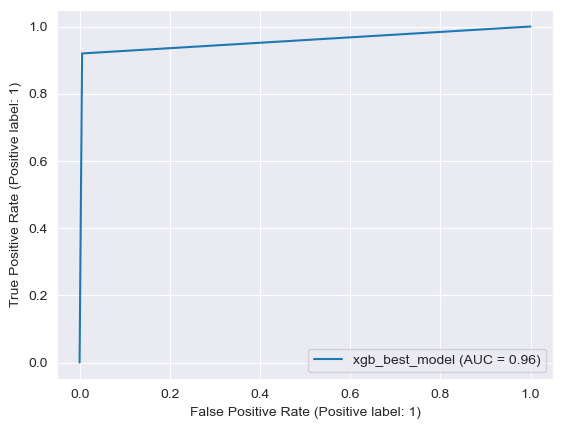

In [156]:
RocCurveDisplay.from_predictions(y_test, y_pred_best_ROS, name='xgb_best_model')
plt.show()

Al haber obtenido un **valor del AUC de 0,96**, la predicción realizada se considera **excelente**. 

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestro:

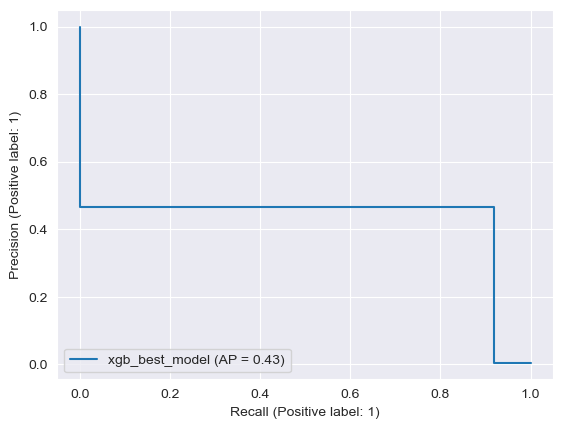

In [157]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_best_ROS, name='xgb_best_model')
plt.show()

Al haber obtenido un **valor del AP de 0,43**, la predicción realizada se considera **mala**, aunque hemos condeguido mejorar una centésima la puntuación, que era de 0,42.

# Modelos no supervisados

## Isolation Forest

In [135]:
fraud = df_total[df_total['is_fraud'] == 1]
non_fraud = df_total[df_total['is_fraud'] == 0]

In [136]:
outlier_fraction = len(fraud) / float(len(non_fraud))

In [137]:
print('Fraud Fraction: ', outlier_fraction)

Fraud Fraction:  0.005237301132062366


### Isolation Forest con el conjunto de datos desbalanceado

In [138]:
isof = IsolationForest(n_estimators=100, max_samples=len(X_train), random_state=42, 
                       contamination=outlier_fraction)

In [139]:
# Entrenamiento con el conjunto de datos original, desbalanceado

isof.fit(X_train)

IsolationForest(contamination=0.005237301132062366, max_samples=1296675,
                random_state=42)

In [140]:
# Predicción a partir del conjunto de datos de prueba

y_pred = isof.predict(X_test)

In [141]:
print("Predicted Anomalous Data Points: ", len(y_pred[y_pred == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred[y_pred == 1]))

Predicted Anomalous Data Points:  3059
Predicted Non Anomalous Data Points:  552660


In [142]:
# replacing -1 by 1 and 1 by 0
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [143]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9897178250158803
ROC AUC:  0.5180672189123108

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    552824
           1       0.04      0.04      0.04      2895

    accuracy                           0.99    555719
   macro avg       0.52      0.52      0.52    555719
weighted avg       0.99      0.99      0.99    555719


 confussion matrix:
 [[549885   2939]
 [  2775    120]]



Obtenemos la **curva ROC** correspondiente a la predicción:

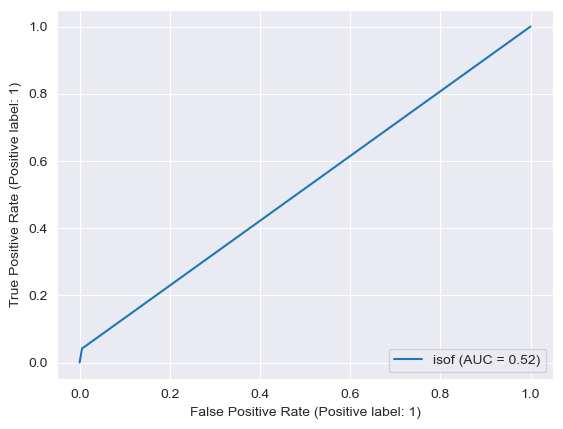

In [144]:
RocCurveDisplay.from_predictions(y_test, y_pred, name='isof')
plt.show()

Al haber obtenido un **valor del AUC de 0,52**, la predicción realizada se considera **mala**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados

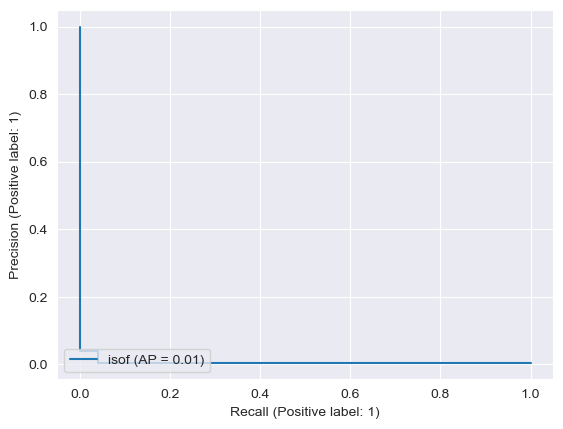

In [145]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name='isof')
plt.show()

Al haber obtenido un **valor del AP de 0,01**, la predicción realizada se considera **mala**. 

### Isolation Forest sobre conjunto de datos con Random Over-Sampling

In [146]:
print(sorted(Counter(y_resampled_ROS).items()))

[(0, 1289919), (1, 1289919)]


Ahora el conjunto de datos está balanceado, así que **contamination=0,5** 

In [147]:
isof_ROS = IsolationForest(n_estimators=100, max_samples=len(X_resampled_ROS), random_state=42, 
                           contamination=0.5)

In [148]:
# Entrenamiento con el conjunto de datos balanceado con random Over-Sampling

isof_ROS.fit(X_resampled_ROS)

IsolationForest(contamination=0.5, max_samples=2579838, random_state=42)

In [149]:
# Predicción a partir del conjunto de datos de prueba

y_pred_ROS = isof_ROS.predict(X_test)

In [150]:
print("Predicted Anomalous Data Points: ", len(y_pred_ROS[y_pred_ROS == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred_ROS[y_pred_ROS == 1]))

Predicted Anomalous Data Points:  437707
Predicted Non Anomalous Data Points:  118012


In [151]:
# replacing -1 by 1 and 1 by 0
y_pred_ROS[y_pred_ROS == 1] = 0
y_pred_ROS[y_pred_ROS == -1] = 1

In [152]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_ROS))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_ROS))
print ('\n clasification report:\n', classification_report(y_test, y_pred_ROS))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ROS))

Accuracy:  0.2145598764843383
ROC AUC:  0.4615926059862531

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.21      0.35    552824
           1       0.00      0.71      0.01      2895

    accuracy                           0.21    555719
   macro avg       0.50      0.46      0.18    555719
weighted avg       0.99      0.21      0.35    555719


 confussion matrix:
 [[117176 435648]
 [   836   2059]]


Obtenemos la **curva ROC** correspondiente a la predicción:

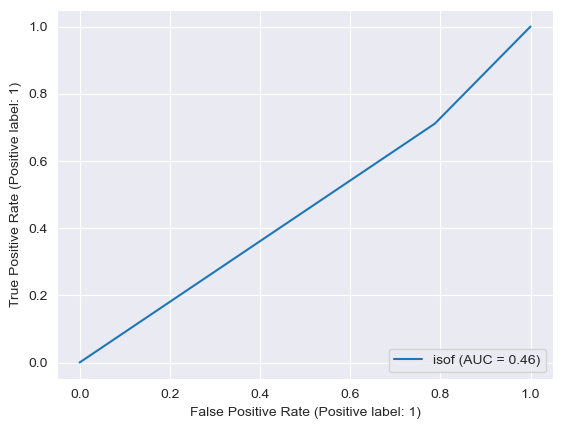

In [153]:
RocCurveDisplay.from_predictions(y_test, y_pred_ROS, name='isof')
plt.show()

Al haber obtenido un **valor del AUC de 0,46**, la predicción realizada se considera **muy mala**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados

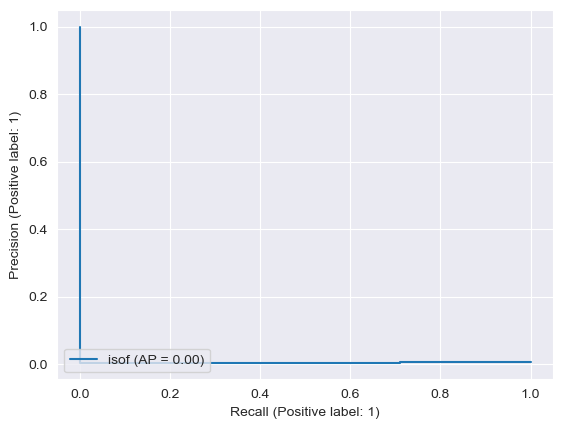

In [154]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_ROS, name='isof')
plt.show()

Al haber obtenido un **valor del AP de 0,00**, la predicción realizada se considera **muy mala**.  

### Isolation Forest sobre conjunto de datos con SMOTE

In [155]:
contador_SMT = sorted(Counter(y_resampled_SMT).items())

In [156]:
print(contador_SMT)

[(0, 1289919), (1, 1289919)]


Ahora el conjunto de datos está balanceado, así que **contamination=0,5** 

In [157]:
isof_SMT = IsolationForest(n_estimators=100, max_samples=len(X_resampled_SMT), random_state=42, 
                           contamination=0.5)

In [158]:
# Entrenamiento con el conjunto de datos balanceado con SMOTE

isof_SMT.fit(X_resampled_SMT)

IsolationForest(contamination=0.5, max_samples=2579838, random_state=42)

In [159]:
# Predicción a partir del conjunto de datos de prueba

y_pred_SMT = isof_SMT.predict(X_test)

In [160]:
print("Predicted Anomalous Data Points: ", len(y_pred_SMT[y_pred_SMT == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred_SMT[y_pred_SMT == 1]))

Predicted Anomalous Data Points:  272267
Predicted Non Anomalous Data Points:  283452


In [161]:
# replacing -1 by 1 and 1 by 0
y_pred_SMT[y_pred_SMT == 1] = 0
y_pred_SMT[y_pred_SMT == -1] = 1

In [162]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_SMT))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_SMT))
print ('\n clasification report:\n', classification_report(y_test, y_pred_SMT))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_SMT))

Accuracy:  0.5093383526566484
ROC AUC:  0.47007449200321405

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.51      0.67    552824
           1       0.00      0.43      0.01      2895

    accuracy                           0.51    555719
   macro avg       0.50      0.47      0.34    555719
weighted avg       0.99      0.51      0.67    555719


 confussion matrix:
 [[281803 271021]
 [  1649   1246]]


Obtenemos la **curva ROC** correspondiente a la predicción:

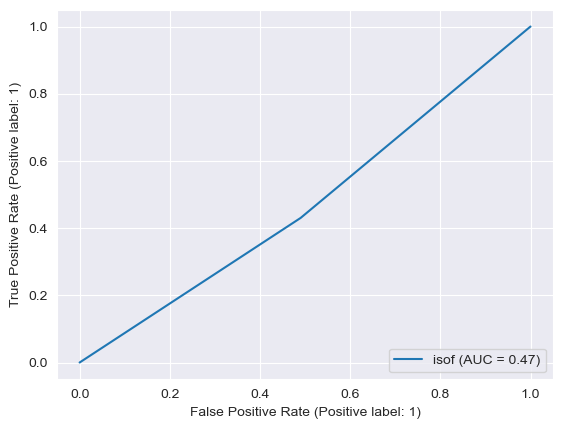

In [163]:
RocCurveDisplay.from_predictions(y_test, y_pred_SMT, name='isof')
plt.show()

Al haber obtenido un **valor del AUC de 0,47**, la predicción realizada se considera **muy mala**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestr 


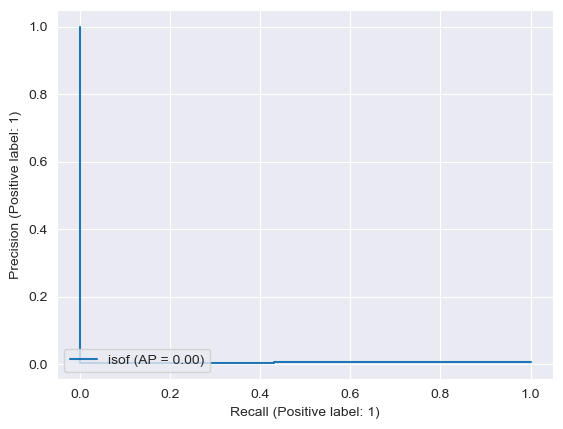

In [164]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_SMT, name='isof')
plt.show()

Al haber obtenido un **valor del AP de 0,00**, la predicción realizada se considera **muy mala**. 

### Isolation Forest sobre conjunto de datos con ADASYN

In [165]:
contador_ADA = sorted(Counter(y_resampled_ADA).items())

In [166]:
print(contador_ADA)

[(0, 1289919), (1, 1287332)]


Calculamos la proporción de outliers del conjunto de datos:

In [167]:
outlier_fraction_ADA = contador_ADA[1][1] / (contador_ADA[0][1] + contador_ADA[1][1])

In [168]:
outlier_fraction_ADA

0.4994981086436672

In [169]:
isof_ADA = IsolationForest(n_estimators=100, max_samples=len(X_resampled_ADA), random_state=42, 
                           contamination=outlier_fraction_ADA)

In [170]:
# Entrenamiento con el conjunto de datos balanceado con ADASYN

isof_ADA.fit(X_resampled_ADA)

IsolationForest(contamination=0.4994981086436672, max_samples=2577251,
                random_state=42)

In [171]:
# Predicción a partir del conjunto de datos de prueba

y_pred_ADA = isof_ADA.predict(X_test)

In [172]:
print("Predicted Anomalous Data Points: ", len(y_pred_ADA[y_pred_ADA == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred_ADA[y_pred_ADA == 1]))

Predicted Anomalous Data Points:  272630
Predicted Non Anomalous Data Points:  283089


In [173]:
# replacing -1 by 1 and 1 by 0
y_pred_ADA[y_pred_ADA == 1] = 0
y_pred_ADA[y_pred_ADA == -1] = 1

In [174]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_ADA))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_ADA))
print ('\n clasification report:\n', classification_report(y_test, y_pred_ADA))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ADA))

Accuracy:  0.5086671501244334
ROC AUC:  0.46887809765438127

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.51      0.67    552824
           1       0.00      0.43      0.01      2895

    accuracy                           0.51    555719
   macro avg       0.50      0.47      0.34    555719
weighted avg       0.99      0.51      0.67    555719


 confussion matrix:
 [[281435 271389]
 [  1654   1241]]


Obtenemos la **curva ROC** correspondiente a la predicción:

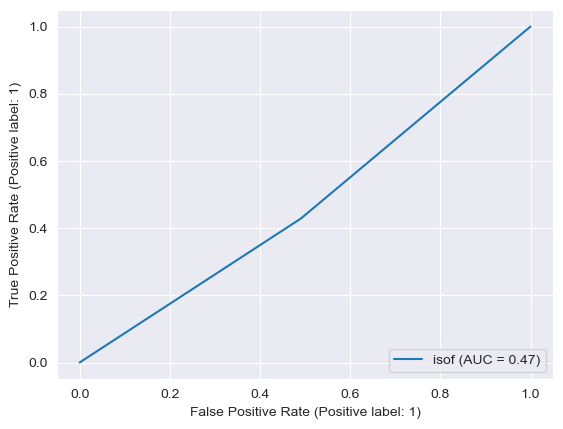

In [175]:
RocCurveDisplay.from_predictions(y_test, y_pred_ADA, name='isof')
plt.show()

Al haber obtenido un **valor del AUC de 0,47**, la predicción realizada se considera **muy mala**.  

Obtenemos ahora la **curva PR**, que enfrenta Precisión y Recall y proporciona más información en los casos con datasets desbalanceados, como el nuestr 


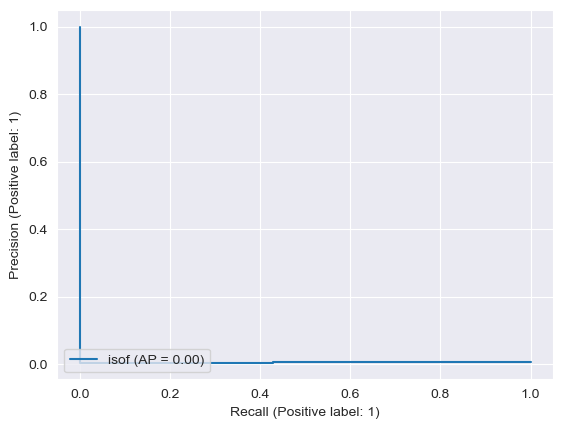

In [176]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred_ADA, name='isof')
plt.show()

Al haber obtenido un **valor del AP de 0,00**, la predicción realizada se considera **muy mala**. 

## Local Outlier Factor (finalmente se ha descartado porque al intentar ejecutarlo el tiempo era insostenible y nunca finalizó) 

In [90]:
fraud = df_total[df_total['is_fraud'] == 1]
non_fraud = df_total[df_total['is_fraud'] == 0]

In [91]:
outlier_fraction = len(fraud) / float(len(non_fraud))

In [92]:
print('Fraud Fraction: ', outlier_fraction)

Fraud Fraction:  0.005237301132062366


In [97]:
lof = LocalOutlierFactor(
    n_neighbors=20,
    algorithm="auto",
    leaf_size=30,
    metric="minkowski",
    p=2,
    metric_params=None,
    contamination=outlier_fraction,
    novelty=True
)

### Local Outlier Factor con el conjunto de datos desbalanceado

In [ ]:
lof.fit(X_train)
y_pred_lof = lof.predict(X_test)

In [ ]:
print("Predicted Anomalous Data Points: ", len(y_pred_lof[y_pred_lof == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred_lof[y_pred_lof == 1]))

In [ ]:
# replacing -1 by 1 and 1 by 0

y_pred_lof[y_pred_lof == 1] = 0
y_pred_lof[y_pred_lof == -1] = 1

In [ ]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_lof))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_lof))
print ('\n clasification report:\n', classification_report(y_test, y_pred_lof))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_lof))

### Local Outlier Factor con Random Over-sampling

In [ ]:
lof_ROS = lof.fit(X_resampled_ROS)
y_pred_lof_ROS = lof_ROS.predict(X_test)

In [ ]:
print("Predicted Anomalous Data Points: ", len(y_pred_lof_ROS[y_pred_lof_ROS == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred_lof_ROS[y_pred_lof_ROS == 1]))

In [ ]:
# replacing -1 by 1 and 1 by 0

y_pred_lof_ROS[y_pred_lof_ROS == 1] = 0
y_pred_lof_ROS[y_pred_lof_ROS == -1] = 1

In [ ]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_lof_ROS))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_lof_ROS))
print ('\n clasification report:\n', classification_report(y_test, y_pred_lof_ROS))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_lof_ROS))

### Local Outlier Factor con SMOTE

In [ ]:
lof_SMT = lof.fit(X_resampled_SMT)
y_pred_lof_SMT = lof_SMT.predict(X_test)

In [ ]:
print("Predicted Anomalous Data Points: ", len(y_pred_lof_SMT [y_pred_lof_SMT  == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred_lof_SMT [y_pred_lof_SMT  == 1]))

In [ ]:
# replacing -1 by 1 and 1 by 0

y_pred_lof_SMT[y_pred_lof_SMT == 1] = 0
y_pred_lof_SMT[y_pred_lof_SMT == -1] = 1

In [ ]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_lof_SMT))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_lof_SMT))
print ('\n clasification report:\n', classification_report(y_test, y_pred_lof_SMT))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_lof_SMT))

### Local Outlier Factor con ADASYN

In [ ]:
lof_ADA = lof.fit(X_resampled_ADA)
y_pred_lof_ADA = lof_ADA.predict(X_test)

In [ ]:
print("Predicted Anomalous Data Points: ", len(y_pred_lof_ADA[y_pred_lof_ADA == -1]))
print("Predicted Non Anomalous Data Points: ", len(y_pred_lof_ADA[y_pred_lof_ADA  == 1]))

In [ ]:
# replacing -1 by 1 and 1 by 0

y_pred_lof_ADA[y_pred_lof_ADA == 1] = 0
y_pred_lof_ADA[y_pred_lof_ADA == -1] = 1

In [ ]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_lof_ADA))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_lof_ADA))
print ('\n clasification report:\n', classification_report(y_test, y_pred_lof_ADA))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_lof_ADA))

## Mejora de hiperparámetros 

### Isolation Forest

#### Optimización con datos de Random Over-Sampling

In [111]:
param_grid = {'n_estimators': list(range(100, 800, 5)), 
              'max_samples': list(range(100, 500, 5)), 
              'contamination': [0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features': [5,10,15], 
              'bootstrap': [True, False], 
              'n_jobs': [5, 10, 20, 30],
              'random_state': [42]}

In [112]:
isof_ROS = IsolationForest(contamination=outlier_fraction)

In [119]:
rscv_if = RandomizedSearchCV(estimator=isof_ROS, 
                              scoring=accuracy_score,
                              param_distributions=param_grid,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=10,
                              n_iter=50)

In [120]:
%%time
rscv_if.fit(X_resampled_ROS, y_resampled_ROS)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


MemoryError: Unable to allocate 15.7 MiB for an array with shape (2063870,) and data type int64

In [ ]:
rscv_if.best_score_

In [ ]:
if_best_model = rscv_if.best_estimator_
if_best_model

In [ ]:
# Realizamos las predicciones sobre X_test

y_pred_best_ROS= if_best_model.predict(X_test)

In [ ]:
# Obtenemos distintas métricas

print ('Accuracy: ', accuracy_score(y_test, y_pred_best_ROS))
print ('ROC AUC: ', roc_auc_score(y_test, y_pred_best_ROS))
print ('F1 score: ', f1_score(y_test, y_pred_best_ROS))
print ('Recall: ', recall_score(y_test, y_pred_best_ROS))
print ('Precision: ', precision_score(y_test, y_pred_best_ROS))
print ('\n clasification report:\n', classification_report(y_test,y_pred_best_ROS))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_best_ROS))